In [1]:
# TODO: adicionar a validacao la de baixo
# TODO: na validacao se acontecer uma presenca no meio eu tenho que contar como erro meu
# TODO: tentar uma unica variaval para ruptura
# TODO: Gerar os indicadores para o mario poder validar.

# ranqueamento das lojas
# se tiver presenca e eu marquei pontos la em cima, poderia contar como erro.

# Historico
- Rede dupla e/ou com 100 neuronios: ruim. Nos primeiros passos o resultado fica razoavel, mas quando avanca piora.
- Rede unica com 10 neuronios: bom.

In [1]:
#https://machinelearningmastery.com/timedistributed-layer-for-long-short-term-memory-networks-in-python/
import sys 
import json
import numpy as np # linear algebra
import matplotlib.pyplot as plt # this is used for the plot the graph 
import math
import collections
import pandas as pd

## for Deep-learing:
import keras
import tensorflow as tf
from keras import backend as K
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import TimeDistributed
from keras.layers import Lambda
from keras.models import model_from_json
from tensorflow.python.keras.callbacks import TensorBoard

from itertools import product
from functools import partial
from time import time

from core.DataExploration import DataExploration
from ruptura.CreateBatch import CreateBatch
from ruptura.RupturaPrediction import RupturaPrediction
from ruptura.RupturaNeuralNetwork import RupturaNeuralNetwork

Using TensorFlow backend.


# CARREGAMENTO DOS DADOS

In [2]:
createBatch = CreateBatch()
amostras = createBatch.loadBatch()
X, Y, Ytest = createBatch.batch(amostras,nDiasTreino = 60, nDiasTeste = 10)

# MODEL DEFINITION

In [9]:
#DEFINE THE MODEL
batch_size = 64
time_steps = X.shape[1]
x_dimension = X.shape[2]
rupNN = RupturaNeuralNetwork()
newModel = True

if newModel:
    n_neurons = 10
    model = Sequential()
    model.add(LSTM(n_neurons, input_shape=(time_steps, x_dimension), return_sequences=True)) 
    model.add(TimeDistributed(Dense(x_dimension, activation='softmax')))
    #model.add(LSTM(n_neurons, input_shape=(time_steps, x_dimension), return_sequences=True)) 
    #model.add(TimeDistributed(Dense(x_dimension, activation='softmax')))
    model.compile(
        loss=rupNN.getCustomLoss((batch_size,time_steps)),
        #loss = 'categorical_crossentropy', 
        optimizer='adam')
    print('MODEL CREATED\n')
    print(model.summary())
else:
    model = rupNN.loadModel((batch_size,time_steps))  # Y dimensions are needed for custom loss definitions
    print('MODEL LOADED\n')
    print(model.summary())

MODEL CREATED

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 10)            600       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 60, 4)             44        
Total params: 644
Trainable params: 644
Non-trainable params: 0
_________________________________________________________________
None


# TRAINING

In [10]:
cut1 = batch_size
cut2 = X.shape[0] - X.shape[0]%batch_size
Xval, Xtrain,_ = np.split(X,[cut1,cut2])
Yval, Ytrain,_ = np.split(Y,[cut1,cut2])

for step in range(10):
    n_epoch = 100
    model.fit(Xtrain, Ytrain, 
                  epochs=n_epoch, 
                  batch_size= batch_size, 
                  validation_data=(Xval, Yval),
                  verbose=2)
    rupNN.saveModel(model)

Train on 1408 samples, validate on 64 samples
Epoch 1/100
 - 4s - loss: 0.4385 - val_loss: 0.4996
Epoch 2/100
 - 3s - loss: 0.4162 - val_loss: 0.4808
Epoch 3/100
 - 3s - loss: 0.3987 - val_loss: 0.4705
Epoch 4/100
 - 4s - loss: 0.3904 - val_loss: 0.4658
Epoch 5/100
 - 3s - loss: 0.3866 - val_loss: 0.4606
Epoch 6/100
 - 3s - loss: 0.3823 - val_loss: 0.4536
Epoch 7/100
 - 3s - loss: 0.3781 - val_loss: 0.4466
Epoch 8/100
 - 3s - loss: 0.3744 - val_loss: 0.4404
Epoch 9/100
 - 3s - loss: 0.3703 - val_loss: 0.4340
Epoch 10/100
 - 3s - loss: 0.3662 - val_loss: 0.4265
Epoch 11/100
 - 3s - loss: 0.3622 - val_loss: 0.4200
Epoch 12/100
 - 3s - loss: 0.3580 - val_loss: 0.4147
Epoch 13/100
 - 3s - loss: 0.3552 - val_loss: 0.4080
Epoch 14/100
 - 3s - loss: 0.3532 - val_loss: 0.4043
Epoch 15/100
 - 3s - loss: 0.3514 - val_loss: 0.4015
Epoch 16/100
 - 3s - loss: 0.3501 - val_loss: 0.3988
Epoch 17/100
 - 3s - loss: 0.3491 - val_loss: 0.3960
Epoch 18/100
 - 3s - loss: 0.3476 - val_loss: 0.3944
Epoch 19/

 - 3s - loss: 0.3026 - val_loss: 0.3516
Epoch 55/100
 - 3s - loss: 0.3026 - val_loss: 0.3512
Epoch 56/100
 - 3s - loss: 0.3023 - val_loss: 0.3509
Epoch 57/100
 - 3s - loss: 0.3021 - val_loss: 0.3509
Epoch 58/100
 - 3s - loss: 0.3020 - val_loss: 0.3509
Epoch 59/100
 - 3s - loss: 0.3018 - val_loss: 0.3509
Epoch 60/100
 - 3s - loss: 0.3016 - val_loss: 0.3503
Epoch 61/100
 - 3s - loss: 0.3014 - val_loss: 0.3509
Epoch 62/100
 - 3s - loss: 0.3014 - val_loss: 0.3505
Epoch 63/100
 - 3s - loss: 0.3013 - val_loss: 0.3504
Epoch 64/100
 - 3s - loss: 0.3012 - val_loss: 0.3501
Epoch 65/100
 - 3s - loss: 0.3010 - val_loss: 0.3498
Epoch 66/100
 - 3s - loss: 0.3008 - val_loss: 0.3500
Epoch 67/100
 - 3s - loss: 0.3007 - val_loss: 0.3497
Epoch 68/100
 - 3s - loss: 0.3005 - val_loss: 0.3493
Epoch 69/100
 - 3s - loss: 0.3004 - val_loss: 0.3494
Epoch 70/100
 - 3s - loss: 0.3002 - val_loss: 0.3490
Epoch 71/100
 - 3s - loss: 0.3003 - val_loss: 0.3490
Epoch 72/100
 - 3s - loss: 0.3000 - val_loss: 0.3490
Epoch 

Epoch 8/100
 - 3s - loss: 0.2882 - val_loss: 0.3371
Epoch 9/100
 - 3s - loss: 0.2880 - val_loss: 0.3368
Epoch 10/100
 - 3s - loss: 0.2881 - val_loss: 0.3363
Epoch 11/100
 - 3s - loss: 0.2880 - val_loss: 0.3366
Epoch 12/100
 - 3s - loss: 0.2878 - val_loss: 0.3368
Epoch 13/100
 - 3s - loss: 0.2876 - val_loss: 0.3361
Epoch 14/100
 - 3s - loss: 0.2878 - val_loss: 0.3373
Epoch 15/100
 - 3s - loss: 0.2878 - val_loss: 0.3360
Epoch 16/100
 - 3s - loss: 0.2875 - val_loss: 0.3362
Epoch 17/100
 - 3s - loss: 0.2875 - val_loss: 0.3361
Epoch 18/100
 - 3s - loss: 0.2873 - val_loss: 0.3366
Epoch 19/100
 - 3s - loss: 0.2873 - val_loss: 0.3356
Epoch 20/100
 - 3s - loss: 0.2873 - val_loss: 0.3357
Epoch 21/100
 - 3s - loss: 0.2879 - val_loss: 0.3375
Epoch 22/100
 - 3s - loss: 0.2874 - val_loss: 0.3369
Epoch 23/100
 - 3s - loss: 0.2871 - val_loss: 0.3363
Epoch 24/100
 - 3s - loss: 0.2869 - val_loss: 0.3362
Epoch 25/100
 - 3s - loss: 0.2870 - val_loss: 0.3353
Epoch 26/100
 - 3s - loss: 0.2867 - val_loss: 0.

Epoch 62/100
 - 3s - loss: 0.2802 - val_loss: 0.3291
Epoch 63/100
 - 3s - loss: 0.2800 - val_loss: 0.3297
Epoch 64/100
 - 3s - loss: 0.2800 - val_loss: 0.3291
Epoch 65/100
 - 3s - loss: 0.2801 - val_loss: 0.3291
Epoch 66/100
 - 3s - loss: 0.2799 - val_loss: 0.3294
Epoch 67/100
 - 3s - loss: 0.2800 - val_loss: 0.3290
Epoch 68/100
 - 3s - loss: 0.2801 - val_loss: 0.3292
Epoch 69/100
 - 3s - loss: 0.2802 - val_loss: 0.3367
Epoch 70/100
 - 3s - loss: 0.2817 - val_loss: 0.3306
Epoch 71/100
 - 3s - loss: 0.2801 - val_loss: 0.3293
Epoch 72/100
 - 3s - loss: 0.2797 - val_loss: 0.3294
Epoch 73/100
 - 3s - loss: 0.2797 - val_loss: 0.3288
Epoch 74/100
 - 3s - loss: 0.2797 - val_loss: 0.3294
Epoch 75/100
 - 3s - loss: 0.2797 - val_loss: 0.3291
Epoch 76/100
 - 3s - loss: 0.2796 - val_loss: 0.3292
Epoch 77/100
 - 3s - loss: 0.2795 - val_loss: 0.3295
Epoch 78/100
 - 3s - loss: 0.2797 - val_loss: 0.3291
Epoch 79/100
 - 3s - loss: 0.2799 - val_loss: 0.3302
Epoch 80/100
 - 3s - loss: 0.2795 - val_loss: 

 - 3s - loss: 0.2751 - val_loss: 0.3249
Epoch 16/100
 - 3s - loss: 0.2752 - val_loss: 0.3265
Epoch 17/100
 - 3s - loss: 0.2746 - val_loss: 0.3252
Epoch 18/100
 - 3s - loss: 0.2746 - val_loss: 0.3256
Epoch 19/100
 - 3s - loss: 0.2749 - val_loss: 0.3255
Epoch 20/100
 - 3s - loss: 0.2744 - val_loss: 0.3250
Epoch 21/100
 - 3s - loss: 0.2745 - val_loss: 0.3250
Epoch 22/100
 - 3s - loss: 0.2744 - val_loss: 0.3245
Epoch 23/100
 - 3s - loss: 0.2744 - val_loss: 0.3248
Epoch 24/100
 - 3s - loss: 0.2744 - val_loss: 0.3246
Epoch 25/100
 - 3s - loss: 0.2746 - val_loss: 0.3249
Epoch 26/100
 - 3s - loss: 0.2749 - val_loss: 0.3253
Epoch 27/100
 - 3s - loss: 0.2743 - val_loss: 0.3252
Epoch 28/100
 - 3s - loss: 0.2746 - val_loss: 0.3247
Epoch 29/100
 - 3s - loss: 0.2741 - val_loss: 0.3247
Epoch 30/100
 - 3s - loss: 0.2741 - val_loss: 0.3253
Epoch 31/100
 - 3s - loss: 0.2743 - val_loss: 0.3253
Epoch 32/100
 - 3s - loss: 0.2741 - val_loss: 0.3248
Epoch 33/100
 - 3s - loss: 0.2741 - val_loss: 0.3243
Epoch 

 - 3s - loss: 0.2705 - val_loss: 0.3208
Epoch 70/100
 - 3s - loss: 0.2703 - val_loss: 0.3211
Epoch 71/100
 - 3s - loss: 0.2703 - val_loss: 0.3211
Epoch 72/100
 - 3s - loss: 0.2704 - val_loss: 0.3209
Epoch 73/100
 - 3s - loss: 0.2702 - val_loss: 0.3208
Epoch 74/100
 - 3s - loss: 0.2704 - val_loss: 0.3209
Epoch 75/100
 - 3s - loss: 0.2703 - val_loss: 0.3206
Epoch 76/100
 - 3s - loss: 0.2702 - val_loss: 0.3216
Epoch 77/100
 - 3s - loss: 0.2701 - val_loss: 0.3217
Epoch 78/100
 - 3s - loss: 0.2705 - val_loss: 0.3210
Epoch 79/100
 - 3s - loss: 0.2699 - val_loss: 0.3206
Epoch 80/100
 - 3s - loss: 0.2699 - val_loss: 0.3207
Epoch 81/100
 - 3s - loss: 0.2702 - val_loss: 0.3211
Epoch 82/100
 - 3s - loss: 0.2699 - val_loss: 0.3207
Epoch 83/100
 - 3s - loss: 0.2701 - val_loss: 0.3204
Epoch 84/100
 - 3s - loss: 0.2701 - val_loss: 0.3212
Epoch 85/100
 - 3s - loss: 0.2701 - val_loss: 0.3205
Epoch 86/100
 - 3s - loss: 0.2698 - val_loss: 0.3206
Epoch 87/100
 - 3s - loss: 0.2699 - val_loss: 0.3208
Epoch 

Epoch 23/100
 - 3s - loss: 0.2671 - val_loss: 0.3177
Epoch 24/100
 - 3s - loss: 0.2674 - val_loss: 0.3171
Epoch 25/100
 - 3s - loss: 0.2669 - val_loss: 0.3175
Epoch 26/100
 - 3s - loss: 0.2668 - val_loss: 0.3173
Epoch 27/100
 - 3s - loss: 0.2668 - val_loss: 0.3175
Epoch 28/100
 - 3s - loss: 0.2669 - val_loss: 0.3165
Epoch 29/100
 - 3s - loss: 0.2666 - val_loss: 0.3173
Epoch 30/100
 - 3s - loss: 0.2666 - val_loss: 0.3210
Epoch 31/100
 - 3s - loss: 0.2669 - val_loss: 0.3180
Epoch 32/100
 - 3s - loss: 0.2664 - val_loss: 0.3169
Epoch 33/100
 - 3s - loss: 0.2664 - val_loss: 0.3168
Epoch 34/100
 - 3s - loss: 0.2665 - val_loss: 0.3166
Epoch 35/100
 - 3s - loss: 0.2664 - val_loss: 0.3174
Epoch 36/100
 - 3s - loss: 0.2664 - val_loss: 0.3203
Epoch 37/100
 - 3s - loss: 0.2664 - val_loss: 0.3168
Epoch 38/100
 - 3s - loss: 0.2663 - val_loss: 0.3170
Epoch 39/100
 - 3s - loss: 0.2664 - val_loss: 0.3167
Epoch 40/100
 - 3s - loss: 0.2666 - val_loss: 0.3173
Epoch 41/100
 - 3s - loss: 0.2663 - val_loss: 

Epoch 77/100
 - 3s - loss: 0.2631 - val_loss: 0.3143
Epoch 78/100
 - 3s - loss: 0.2632 - val_loss: 0.3143
Epoch 79/100
 - 3s - loss: 0.2633 - val_loss: 0.3168
Epoch 80/100
 - 3s - loss: 0.2634 - val_loss: 0.3137
Epoch 81/100
 - 3s - loss: 0.2630 - val_loss: 0.3142
Epoch 82/100
 - 3s - loss: 0.2635 - val_loss: 0.3143
Epoch 83/100
 - 3s - loss: 0.2633 - val_loss: 0.3153
Epoch 84/100
 - 3s - loss: 0.2630 - val_loss: 0.3183
Epoch 85/100
 - 3s - loss: 0.2631 - val_loss: 0.3145
Epoch 86/100
 - 3s - loss: 0.2631 - val_loss: 0.3148
Epoch 87/100
 - 3s - loss: 0.2629 - val_loss: 0.3156
Epoch 88/100
 - 3s - loss: 0.2630 - val_loss: 0.3146
Epoch 89/100
 - 3s - loss: 0.2628 - val_loss: 0.3139
Epoch 90/100
 - 3s - loss: 0.2630 - val_loss: 0.3142
Epoch 91/100
 - 3s - loss: 0.2629 - val_loss: 0.3143
Epoch 92/100
 - 3s - loss: 0.2631 - val_loss: 0.3179
Epoch 93/100
 - 3s - loss: 0.2628 - val_loss: 0.3144
Epoch 94/100
 - 3s - loss: 0.2632 - val_loss: 0.3156
Epoch 95/100
 - 3s - loss: 0.2631 - val_loss: 

 - 3s - loss: 0.2605 - val_loss: 0.3115
Epoch 31/100
 - 3s - loss: 0.2606 - val_loss: 0.3112
Epoch 32/100
 - 3s - loss: 0.2603 - val_loss: 0.3112
Epoch 33/100
 - 3s - loss: 0.2604 - val_loss: 0.3112
Epoch 34/100
 - 3s - loss: 0.2603 - val_loss: 0.3111
Epoch 35/100
 - 3s - loss: 0.2602 - val_loss: 0.3112
Epoch 36/100
 - 3s - loss: 0.2601 - val_loss: 0.3116
Epoch 37/100
 - 3s - loss: 0.2604 - val_loss: 0.3110
Epoch 38/100
 - 3s - loss: 0.2605 - val_loss: 0.3109
Epoch 39/100
 - 3s - loss: 0.2604 - val_loss: 0.3111
Epoch 40/100
 - 3s - loss: 0.2601 - val_loss: 0.3116
Epoch 41/100
 - 3s - loss: 0.2600 - val_loss: 0.3116
Epoch 42/100
 - 3s - loss: 0.2601 - val_loss: 0.3111
Epoch 43/100
 - 3s - loss: 0.2601 - val_loss: 0.3120
Epoch 44/100
 - 3s - loss: 0.2603 - val_loss: 0.3128
Epoch 45/100
 - 3s - loss: 0.2602 - val_loss: 0.3109
Epoch 46/100
 - 3s - loss: 0.2600 - val_loss: 0.3117
Epoch 47/100
 - 3s - loss: 0.2600 - val_loss: 0.3109
Epoch 48/100
 - 3s - loss: 0.2598 - val_loss: 0.3110
Epoch 

 - 3s - loss: 0.2584 - val_loss: 0.3095
Epoch 85/100
 - 3s - loss: 0.2588 - val_loss: 0.3095
Epoch 86/100
 - 3s - loss: 0.2584 - val_loss: 0.3094
Epoch 87/100
 - 3s - loss: 0.2582 - val_loss: 0.3097
Epoch 88/100
 - 3s - loss: 0.2585 - val_loss: 0.3093
Epoch 89/100
 - 3s - loss: 0.2583 - val_loss: 0.3087
Epoch 90/100
 - 3s - loss: 0.2581 - val_loss: 0.3092
Epoch 91/100
 - 3s - loss: 0.2581 - val_loss: 0.3094
Epoch 92/100
 - 3s - loss: 0.2583 - val_loss: 0.3097
Epoch 93/100
 - 3s - loss: 0.2585 - val_loss: 0.3100
Epoch 94/100
 - 3s - loss: 0.2588 - val_loss: 0.3090
Epoch 95/100
 - 3s - loss: 0.2585 - val_loss: 0.3096
Epoch 96/100
 - 3s - loss: 0.2583 - val_loss: 0.3092
Epoch 97/100
 - 3s - loss: 0.2580 - val_loss: 0.3091
Epoch 98/100
 - 3s - loss: 0.2582 - val_loss: 0.3086
Epoch 99/100
 - 3s - loss: 0.2585 - val_loss: 0.3096
Epoch 100/100
 - 3s - loss: 0.2581 - val_loss: 0.3093
Train on 1408 samples, validate on 64 samples
Epoch 1/100
 - 3s - loss: 0.2580 - val_loss: 0.3090
Epoch 2/100
 

Epoch 38/100
 - 3s - loss: 0.2569 - val_loss: 0.3074
Epoch 39/100
 - 3s - loss: 0.2567 - val_loss: 0.3085
Epoch 40/100
 - 3s - loss: 0.2570 - val_loss: 0.3082
Epoch 41/100
 - 3s - loss: 0.2570 - val_loss: 0.3073
Epoch 42/100
 - 3s - loss: 0.2568 - val_loss: 0.3073
Epoch 43/100
 - 3s - loss: 0.2567 - val_loss: 0.3077
Epoch 44/100
 - 3s - loss: 0.2569 - val_loss: 0.3078
Epoch 45/100
 - 3s - loss: 0.2567 - val_loss: 0.3079
Epoch 46/100
 - 3s - loss: 0.2567 - val_loss: 0.3076
Epoch 47/100
 - 3s - loss: 0.2570 - val_loss: 0.3086
Epoch 48/100
 - 3s - loss: 0.2567 - val_loss: 0.3079
Epoch 49/100
 - 3s - loss: 0.2570 - val_loss: 0.3079
Epoch 50/100
 - 3s - loss: 0.2575 - val_loss: 0.3070
Epoch 51/100
 - 3s - loss: 0.2569 - val_loss: 0.3076
Epoch 52/100
 - 3s - loss: 0.2567 - val_loss: 0.3084
Epoch 53/100
 - 3s - loss: 0.2568 - val_loss: 0.3083
Epoch 54/100
 - 3s - loss: 0.2569 - val_loss: 0.3091
Epoch 55/100
 - 3s - loss: 0.2570 - val_loss: 0.3071
Epoch 56/100
 - 3s - loss: 0.2568 - val_loss: 

Epoch 92/100
 - 3s - loss: 0.2555 - val_loss: 0.3063
Epoch 93/100
 - 3s - loss: 0.2555 - val_loss: 0.3064
Epoch 94/100
 - 3s - loss: 0.2555 - val_loss: 0.3062
Epoch 95/100
 - 3s - loss: 0.2554 - val_loss: 0.3066
Epoch 96/100
 - 3s - loss: 0.2554 - val_loss: 0.3066
Epoch 97/100
 - 3s - loss: 0.2557 - val_loss: 0.3061
Epoch 98/100
 - 3s - loss: 0.2564 - val_loss: 0.3059
Epoch 99/100
 - 3s - loss: 0.2554 - val_loss: 0.3066
Epoch 100/100
 - 3s - loss: 0.2556 - val_loss: 0.3064
Train on 1408 samples, validate on 64 samples
Epoch 1/100
 - 3s - loss: 0.2554 - val_loss: 0.3062
Epoch 2/100
 - 3s - loss: 0.2556 - val_loss: 0.3068
Epoch 3/100
 - 3s - loss: 0.2555 - val_loss: 0.3066
Epoch 4/100
 - 3s - loss: 0.2553 - val_loss: 0.3062
Epoch 5/100
 - 3s - loss: 0.2554 - val_loss: 0.3069
Epoch 6/100
 - 3s - loss: 0.2555 - val_loss: 0.3069
Epoch 7/100
 - 3s - loss: 0.2555 - val_loss: 0.3073
Epoch 8/100
 - 3s - loss: 0.2554 - val_loss: 0.3062
Epoch 9/100
 - 3s - loss: 0.2554 - val_loss: 0.3081
Epoch 10

 - 3s - loss: 0.2544 - val_loss: 0.3054
Epoch 46/100
 - 3s - loss: 0.2541 - val_loss: 0.3050
Epoch 47/100
 - 3s - loss: 0.2542 - val_loss: 0.3051
Epoch 48/100
 - 3s - loss: 0.2540 - val_loss: 0.3058
Epoch 49/100
 - 3s - loss: 0.2544 - val_loss: 0.3061
Epoch 50/100
 - 3s - loss: 0.2540 - val_loss: 0.3067
Epoch 51/100
 - 3s - loss: 0.2550 - val_loss: 0.3060
Epoch 52/100
 - 3s - loss: 0.2542 - val_loss: 0.3055
Epoch 53/100
 - 3s - loss: 0.2542 - val_loss: 0.3058
Epoch 54/100
 - 3s - loss: 0.2540 - val_loss: 0.3058
Epoch 55/100
 - 3s - loss: 0.2541 - val_loss: 0.3055
Epoch 56/100
 - 3s - loss: 0.2542 - val_loss: 0.3057
Epoch 57/100
 - 3s - loss: 0.2545 - val_loss: 0.3056
Epoch 58/100
 - 3s - loss: 0.2541 - val_loss: 0.3051
Epoch 59/100
 - 3s - loss: 0.2540 - val_loss: 0.3056
Epoch 60/100
 - 3s - loss: 0.2542 - val_loss: 0.3061
Epoch 61/100
 - 3s - loss: 0.2547 - val_loss: 0.3050
Epoch 62/100
 - 3s - loss: 0.2541 - val_loss: 0.3050
Epoch 63/100
 - 3s - loss: 0.2540 - val_loss: 0.3051
Epoch 

 - 4s - loss: 0.2539 - val_loss: 0.3048
Epoch 100/100
 - 4s - loss: 0.2539 - val_loss: 0.3036
Train on 1408 samples, validate on 64 samples
Epoch 1/100
 - 4s - loss: 0.2531 - val_loss: 0.3053
Epoch 2/100
 - 4s - loss: 0.2531 - val_loss: 0.3048
Epoch 3/100
 - 4s - loss: 0.2529 - val_loss: 0.3044
Epoch 4/100
 - 4s - loss: 0.2531 - val_loss: 0.3043
Epoch 5/100
 - 4s - loss: 0.2530 - val_loss: 0.3054
Epoch 6/100
 - 4s - loss: 0.2533 - val_loss: 0.3041
Epoch 7/100
 - 4s - loss: 0.2534 - val_loss: 0.3047
Epoch 8/100
 - 4s - loss: 0.2530 - val_loss: 0.3047
Epoch 9/100
 - 4s - loss: 0.2533 - val_loss: 0.3045
Epoch 10/100
 - 4s - loss: 0.2535 - val_loss: 0.3056
Epoch 11/100
 - 4s - loss: 0.2533 - val_loss: 0.3047
Epoch 12/100
 - 4s - loss: 0.2533 - val_loss: 0.3047
Epoch 13/100
 - 4s - loss: 0.2533 - val_loss: 0.3043
Epoch 14/100
 - 4s - loss: 0.2532 - val_loss: 0.3034
Epoch 15/100
 - 4s - loss: 0.2530 - val_loss: 0.3042
Epoch 16/100
 - 4s - loss: 0.2535 - val_loss: 0.3055
Epoch 17/100
 - 4s - 

Epoch 53/100
 - 5s - loss: 0.2521 - val_loss: 0.3032
Epoch 54/100
 - 5s - loss: 0.2525 - val_loss: 0.3034
Epoch 55/100
 - 4s - loss: 0.2525 - val_loss: 0.3030
Epoch 56/100
 - 4s - loss: 0.2524 - val_loss: 0.3033
Epoch 57/100
 - 3s - loss: 0.2523 - val_loss: 0.3033
Epoch 58/100
 - 4s - loss: 0.2523 - val_loss: 0.3037
Epoch 59/100
 - 4s - loss: 0.2524 - val_loss: 0.3029
Epoch 60/100
 - 4s - loss: 0.2520 - val_loss: 0.3026
Epoch 61/100
 - 4s - loss: 0.2519 - val_loss: 0.3035
Epoch 62/100
 - 4s - loss: 0.2520 - val_loss: 0.3031
Epoch 63/100
 - 4s - loss: 0.2519 - val_loss: 0.3031
Epoch 64/100
 - 4s - loss: 0.2520 - val_loss: 0.3024
Epoch 65/100
 - 4s - loss: 0.2521 - val_loss: 0.3036
Epoch 66/100
 - 4s - loss: 0.2521 - val_loss: 0.3045
Epoch 67/100
 - 4s - loss: 0.2522 - val_loss: 0.3030
Epoch 68/100
 - 4s - loss: 0.2525 - val_loss: 0.3029
Epoch 69/100
 - 4s - loss: 0.2522 - val_loss: 0.3036
Epoch 70/100
 - 4s - loss: 0.2520 - val_loss: 0.3036
Epoch 71/100
 - 4s - loss: 0.2520 - val_loss: 

 - 4s - loss: 0.2517 - val_loss: 0.3027
Epoch 7/100
 - 4s - loss: 0.2512 - val_loss: 0.3015
Epoch 8/100
 - 4s - loss: 0.2513 - val_loss: 0.3024
Epoch 9/100
 - 4s - loss: 0.2512 - val_loss: 0.3015
Epoch 10/100
 - 4s - loss: 0.2511 - val_loss: 0.3017
Epoch 11/100
 - 4s - loss: 0.2514 - val_loss: 0.3014
Epoch 12/100
 - 4s - loss: 0.2514 - val_loss: 0.3019
Epoch 13/100
 - 4s - loss: 0.2513 - val_loss: 0.3020
Epoch 14/100
 - 4s - loss: 0.2514 - val_loss: 0.3022
Epoch 15/100
 - 4s - loss: 0.2517 - val_loss: 0.3023
Epoch 16/100
 - 4s - loss: 0.2515 - val_loss: 0.3014
Epoch 17/100
 - 4s - loss: 0.2516 - val_loss: 0.3010
Epoch 18/100
 - 4s - loss: 0.2514 - val_loss: 0.3024
Epoch 19/100
 - 4s - loss: 0.2513 - val_loss: 0.3020
Epoch 20/100
 - 4s - loss: 0.2514 - val_loss: 0.3029
Epoch 21/100
 - 4s - loss: 0.2517 - val_loss: 0.3021
Epoch 22/100
 - 4s - loss: 0.2513 - val_loss: 0.3019
Epoch 23/100
 - 4s - loss: 0.2517 - val_loss: 0.3029
Epoch 24/100
 - 4s - loss: 0.2521 - val_loss: 0.3016
Epoch 25/

 - 3s - loss: 0.2506 - val_loss: 0.3002
Epoch 61/100
 - 3s - loss: 0.2505 - val_loss: 0.3005
Epoch 62/100
 - 3s - loss: 0.2506 - val_loss: 0.3013
Epoch 63/100
 - 3s - loss: 0.2508 - val_loss: 0.3009
Epoch 64/100
 - 3s - loss: 0.2506 - val_loss: 0.3000
Epoch 65/100
 - 3s - loss: 0.2508 - val_loss: 0.3006
Epoch 66/100
 - 3s - loss: 0.2507 - val_loss: 0.3008
Epoch 67/100
 - 3s - loss: 0.2506 - val_loss: 0.3006
Epoch 68/100
 - 3s - loss: 0.2504 - val_loss: 0.2998
Epoch 69/100
 - 3s - loss: 0.2506 - val_loss: 0.3001
Epoch 70/100
 - 3s - loss: 0.2504 - val_loss: 0.3007
Epoch 71/100
 - 3s - loss: 0.2506 - val_loss: 0.3019
Epoch 72/100
 - 3s - loss: 0.2510 - val_loss: 0.3009
Epoch 73/100
 - 3s - loss: 0.2505 - val_loss: 0.3010
Epoch 74/100
 - 3s - loss: 0.2505 - val_loss: 0.3011
Epoch 75/100
 - 3s - loss: 0.2503 - val_loss: 0.3006
Epoch 76/100
 - 3s - loss: 0.2503 - val_loss: 0.3012
Epoch 77/100
 - 3s - loss: 0.2509 - val_loss: 0.3005
Epoch 78/100
 - 3s - loss: 0.2504 - val_loss: 0.3012
Epoch 

Epoch 14/100
 - 3s - loss: 0.2507 - val_loss: 0.3021
Epoch 15/100
 - 3s - loss: 0.2504 - val_loss: 0.3004
Epoch 16/100
 - 3s - loss: 0.2499 - val_loss: 0.2996
Epoch 17/100
 - 3s - loss: 0.2497 - val_loss: 0.2993
Epoch 18/100
 - 3s - loss: 0.2497 - val_loss: 0.2996
Epoch 19/100
 - 3s - loss: 0.2498 - val_loss: 0.3002
Epoch 20/100
 - 3s - loss: 0.2498 - val_loss: 0.2993
Epoch 21/100
 - 3s - loss: 0.2503 - val_loss: 0.3004
Epoch 22/100
 - 3s - loss: 0.2501 - val_loss: 0.2992
Epoch 23/100
 - 3s - loss: 0.2501 - val_loss: 0.2992
Epoch 24/100
 - 3s - loss: 0.2496 - val_loss: 0.3006
Epoch 25/100
 - 3s - loss: 0.2498 - val_loss: 0.3003
Epoch 26/100
 - 3s - loss: 0.2500 - val_loss: 0.2997
Epoch 27/100
 - 3s - loss: 0.2503 - val_loss: 0.3010
Epoch 28/100
 - 3s - loss: 0.2506 - val_loss: 0.2991
Epoch 29/100
 - 3s - loss: 0.2504 - val_loss: 0.2995
Epoch 30/100
 - 3s - loss: 0.2500 - val_loss: 0.3006
Epoch 31/100
 - 3s - loss: 0.2503 - val_loss: 0.2996
Epoch 32/100
 - 3s - loss: 0.2499 - val_loss: 

Epoch 68/100
 - 3s - loss: 0.2491 - val_loss: 0.2993
Epoch 69/100
 - 3s - loss: 0.2495 - val_loss: 0.2980
Epoch 70/100
 - 3s - loss: 0.2493 - val_loss: 0.2992
Epoch 71/100
 - 3s - loss: 0.2495 - val_loss: 0.2979
Epoch 72/100
 - 3s - loss: 0.2492 - val_loss: 0.3000
Epoch 73/100
 - 3s - loss: 0.2495 - val_loss: 0.2994
Epoch 74/100
 - 3s - loss: 0.2500 - val_loss: 0.2997
Epoch 75/100
 - 3s - loss: 0.2497 - val_loss: 0.2980
Epoch 76/100
 - 3s - loss: 0.2497 - val_loss: 0.2982
Epoch 77/100
 - 3s - loss: 0.2493 - val_loss: 0.2999
Epoch 78/100
 - 3s - loss: 0.2495 - val_loss: 0.2986
Epoch 79/100
 - 3s - loss: 0.2493 - val_loss: 0.3007
Epoch 80/100
 - 3s - loss: 0.2492 - val_loss: 0.2992
Epoch 81/100
 - 3s - loss: 0.2491 - val_loss: 0.2981
Epoch 82/100
 - 3s - loss: 0.2491 - val_loss: 0.2988
Epoch 83/100
 - 3s - loss: 0.2490 - val_loss: 0.2984
Epoch 84/100
 - 3s - loss: 0.2490 - val_loss: 0.2988
Epoch 85/100
 - 3s - loss: 0.2491 - val_loss: 0.2985
Epoch 86/100
 - 3s - loss: 0.2492 - val_loss: 

 - 3s - loss: 0.2491 - val_loss: 0.2977
Epoch 22/100
 - 3s - loss: 0.2491 - val_loss: 0.2976
Epoch 23/100
 - 3s - loss: 0.2491 - val_loss: 0.2996
Epoch 24/100
 - 3s - loss: 0.2490 - val_loss: 0.2986
Epoch 25/100
 - 3s - loss: 0.2485 - val_loss: 0.2979
Epoch 26/100
 - 3s - loss: 0.2485 - val_loss: 0.2989
Epoch 27/100
 - 3s - loss: 0.2486 - val_loss: 0.2973
Epoch 28/100
 - 3s - loss: 0.2486 - val_loss: 0.2974
Epoch 29/100
 - 3s - loss: 0.2493 - val_loss: 0.2979
Epoch 30/100
 - 3s - loss: 0.2485 - val_loss: 0.2975
Epoch 31/100
 - 3s - loss: 0.2492 - val_loss: 0.2973
Epoch 32/100
 - 3s - loss: 0.2487 - val_loss: 0.2992
Epoch 33/100
 - 3s - loss: 0.2486 - val_loss: 0.2982
Epoch 34/100
 - 3s - loss: 0.2484 - val_loss: 0.2977
Epoch 35/100
 - 3s - loss: 0.2485 - val_loss: 0.2983
Epoch 36/100
 - 3s - loss: 0.2487 - val_loss: 0.2980
Epoch 37/100
 - 3s - loss: 0.2490 - val_loss: 0.2993
Epoch 38/100
 - 3s - loss: 0.2495 - val_loss: 0.2985
Epoch 39/100
 - 3s - loss: 0.2490 - val_loss: 0.3002
Epoch 

 - 3s - loss: 0.2493 - val_loss: 0.2977
Epoch 76/100
 - 3s - loss: 0.2489 - val_loss: 0.2974
Epoch 77/100
 - 3s - loss: 0.2484 - val_loss: 0.2981
Epoch 78/100
 - 3s - loss: 0.2481 - val_loss: 0.2974
Epoch 79/100
 - 3s - loss: 0.2482 - val_loss: 0.2990
Epoch 80/100
 - 3s - loss: 0.2485 - val_loss: 0.2993
Epoch 81/100
 - 3s - loss: 0.2483 - val_loss: 0.2978
Epoch 82/100
 - 3s - loss: 0.2483 - val_loss: 0.2972
Epoch 83/100
 - 3s - loss: 0.2484 - val_loss: 0.2979
Epoch 84/100
 - 3s - loss: 0.2481 - val_loss: 0.2987
Epoch 85/100
 - 3s - loss: 0.2481 - val_loss: 0.2976
Epoch 86/100
 - 3s - loss: 0.2483 - val_loss: 0.2997
Epoch 87/100
 - 3s - loss: 0.2487 - val_loss: 0.2983
Epoch 88/100
 - 3s - loss: 0.2490 - val_loss: 0.2974
Epoch 89/100
 - 3s - loss: 0.2483 - val_loss: 0.2967
Epoch 90/100
 - 3s - loss: 0.2486 - val_loss: 0.3001
Epoch 91/100
 - 3s - loss: 0.2481 - val_loss: 0.2991
Epoch 92/100
 - 3s - loss: 0.2482 - val_loss: 0.2983
Epoch 93/100
 - 3s - loss: 0.2489 - val_loss: 0.2979
Epoch 

Epoch 29/100
 - 3s - loss: 0.2478 - val_loss: 0.2981
Epoch 30/100
 - 3s - loss: 0.2481 - val_loss: 0.2984
Epoch 31/100
 - 3s - loss: 0.2478 - val_loss: 0.2972
Epoch 32/100
 - 3s - loss: 0.2479 - val_loss: 0.2979
Epoch 33/100
 - 3s - loss: 0.2481 - val_loss: 0.2992
Epoch 34/100
 - 3s - loss: 0.2479 - val_loss: 0.2985
Epoch 35/100
 - 3s - loss: 0.2482 - val_loss: 0.2972
Epoch 36/100
 - 3s - loss: 0.2479 - val_loss: 0.2971
Epoch 37/100
 - 3s - loss: 0.2478 - val_loss: 0.2983
Epoch 38/100
 - 3s - loss: 0.2482 - val_loss: 0.2990
Epoch 39/100
 - 3s - loss: 0.2488 - val_loss: 0.2997
Epoch 40/100
 - 3s - loss: 0.2484 - val_loss: 0.2977
Epoch 41/100
 - 3s - loss: 0.2483 - val_loss: 0.2982
Epoch 42/100
 - 3s - loss: 0.2488 - val_loss: 0.2990
Epoch 43/100
 - 3s - loss: 0.2479 - val_loss: 0.2972
Epoch 44/100
 - 3s - loss: 0.2479 - val_loss: 0.2968
Epoch 45/100
 - 3s - loss: 0.2476 - val_loss: 0.2973
Epoch 46/100
 - 3s - loss: 0.2481 - val_loss: 0.2986
Epoch 47/100
 - 3s - loss: 0.2477 - val_loss: 

Epoch 83/100
 - 3s - loss: 0.2473 - val_loss: 0.2972
Epoch 84/100
 - 3s - loss: 0.2471 - val_loss: 0.2963
Epoch 85/100
 - 3s - loss: 0.2471 - val_loss: 0.2975
Epoch 86/100
 - 3s - loss: 0.2481 - val_loss: 0.2965
Epoch 87/100
 - 3s - loss: 0.2475 - val_loss: 0.2967
Epoch 88/100
 - 3s - loss: 0.2478 - val_loss: 0.2960
Epoch 89/100
 - 3s - loss: 0.2474 - val_loss: 0.2955
Epoch 90/100
 - 3s - loss: 0.2475 - val_loss: 0.2966
Epoch 91/100
 - 3s - loss: 0.2473 - val_loss: 0.2978
Epoch 92/100
 - 3s - loss: 0.2478 - val_loss: 0.2964
Epoch 93/100
 - 3s - loss: 0.2474 - val_loss: 0.2974
Epoch 94/100
 - 3s - loss: 0.2473 - val_loss: 0.2974
Epoch 95/100
 - 3s - loss: 0.2472 - val_loss: 0.2962
Epoch 96/100
 - 3s - loss: 0.2476 - val_loss: 0.2970
Epoch 97/100
 - 3s - loss: 0.2486 - val_loss: 0.2965
Epoch 98/100
 - 3s - loss: 0.2478 - val_loss: 0.2968
Epoch 99/100
 - 3s - loss: 0.2475 - val_loss: 0.2979
Epoch 100/100
 - 3s - loss: 0.2477 - val_loss: 0.2961
Train on 1408 samples, validate on 64 samples

 - 3s - loss: 0.2472 - val_loss: 0.2969
Epoch 37/100
 - 3s - loss: 0.2469 - val_loss: 0.2968
Epoch 38/100
 - 3s - loss: 0.2471 - val_loss: 0.2969
Epoch 39/100
 - 3s - loss: 0.2471 - val_loss: 0.2970
Epoch 40/100
 - 3s - loss: 0.2469 - val_loss: 0.2958
Epoch 41/100
 - 3s - loss: 0.2469 - val_loss: 0.2960
Epoch 42/100
 - 3s - loss: 0.2471 - val_loss: 0.2958
Epoch 43/100
 - 3s - loss: 0.2470 - val_loss: 0.2972
Epoch 44/100
 - 3s - loss: 0.2470 - val_loss: 0.2950
Epoch 45/100
 - 3s - loss: 0.2472 - val_loss: 0.2957
Epoch 46/100
 - 3s - loss: 0.2467 - val_loss: 0.2961
Epoch 47/100
 - 3s - loss: 0.2467 - val_loss: 0.2963
Epoch 48/100
 - 3s - loss: 0.2468 - val_loss: 0.2973
Epoch 49/100
 - 3s - loss: 0.2472 - val_loss: 0.2963
Epoch 50/100
 - 3s - loss: 0.2471 - val_loss: 0.2972
Epoch 51/100
 - 3s - loss: 0.2483 - val_loss: 0.2969
Epoch 52/100
 - 3s - loss: 0.2485 - val_loss: 0.2970
Epoch 53/100
 - 3s - loss: 0.2470 - val_loss: 0.2964
Epoch 54/100
 - 3s - loss: 0.2469 - val_loss: 0.2973
Epoch 

 - 3s - loss: 0.2471 - val_loss: 0.2971
Epoch 91/100
 - 3s - loss: 0.2478 - val_loss: 0.2961
Epoch 92/100
 - 3s - loss: 0.2468 - val_loss: 0.2958
Epoch 93/100
 - 3s - loss: 0.2474 - val_loss: 0.2967
Epoch 94/100
 - 3s - loss: 0.2469 - val_loss: 0.2966
Epoch 95/100
 - 3s - loss: 0.2471 - val_loss: 0.2979
Epoch 96/100
 - 3s - loss: 0.2469 - val_loss: 0.2971
Epoch 97/100
 - 3s - loss: 0.2466 - val_loss: 0.2958
Epoch 98/100
 - 3s - loss: 0.2469 - val_loss: 0.2956
Epoch 99/100
 - 3s - loss: 0.2465 - val_loss: 0.2959
Epoch 100/100
 - 3s - loss: 0.2464 - val_loss: 0.2959
Train on 1408 samples, validate on 64 samples
Epoch 1/100
 - 3s - loss: 0.2462 - val_loss: 0.2979
Epoch 2/100
 - 3s - loss: 0.2471 - val_loss: 0.2967
Epoch 3/100
 - 3s - loss: 0.2466 - val_loss: 0.2975
Epoch 4/100
 - 3s - loss: 0.2466 - val_loss: 0.2971
Epoch 5/100
 - 3s - loss: 0.2464 - val_loss: 0.2965
Epoch 6/100
 - 3s - loss: 0.2463 - val_loss: 0.2965
Epoch 7/100
 - 3s - loss: 0.2467 - val_loss: 0.2961
Epoch 8/100
 - 3s -

Epoch 44/100
 - 3s - loss: 0.2464 - val_loss: 0.2947
Epoch 45/100
 - 3s - loss: 0.2476 - val_loss: 0.2969
Epoch 46/100
 - 3s - loss: 0.2476 - val_loss: 0.2969
Epoch 47/100
 - 3s - loss: 0.2465 - val_loss: 0.2959
Epoch 48/100
 - 3s - loss: 0.2469 - val_loss: 0.2965
Epoch 49/100
 - 3s - loss: 0.2465 - val_loss: 0.2971
Epoch 50/100
 - 3s - loss: 0.2461 - val_loss: 0.2953
Epoch 51/100
 - 3s - loss: 0.2469 - val_loss: 0.2966
Epoch 52/100
 - 3s - loss: 0.2470 - val_loss: 0.2967
Epoch 53/100
 - 3s - loss: 0.2474 - val_loss: 0.2957
Epoch 54/100
 - 3s - loss: 0.2466 - val_loss: 0.2953
Epoch 55/100
 - 3s - loss: 0.2463 - val_loss: 0.2960
Epoch 56/100
 - 3s - loss: 0.2462 - val_loss: 0.2955
Epoch 57/100
 - 3s - loss: 0.2462 - val_loss: 0.2957
Epoch 58/100
 - 3s - loss: 0.2461 - val_loss: 0.2962
Epoch 59/100
 - 3s - loss: 0.2462 - val_loss: 0.2965
Epoch 60/100
 - 3s - loss: 0.2461 - val_loss: 0.2966
Epoch 61/100
 - 3s - loss: 0.2466 - val_loss: 0.2960
Epoch 62/100
 - 3s - loss: 0.2462 - val_loss: 

Epoch 98/100
 - 3s - loss: 0.2488 - val_loss: 0.2952
Epoch 99/100
 - 3s - loss: 0.2473 - val_loss: 0.2954
Epoch 100/100
 - 3s - loss: 0.2465 - val_loss: 0.2953
Train on 1408 samples, validate on 64 samples
Epoch 1/100
 - 3s - loss: 0.2462 - val_loss: 0.2962
Epoch 2/100
 - 3s - loss: 0.2461 - val_loss: 0.2954
Epoch 3/100
 - 3s - loss: 0.2460 - val_loss: 0.2948
Epoch 4/100
 - 3s - loss: 0.2460 - val_loss: 0.2953
Epoch 5/100
 - 3s - loss: 0.2457 - val_loss: 0.2946
Epoch 6/100
 - 3s - loss: 0.2462 - val_loss: 0.2962
Epoch 7/100
 - 3s - loss: 0.2461 - val_loss: 0.2951
Epoch 8/100
 - 3s - loss: 0.2461 - val_loss: 0.2962
Epoch 9/100
 - 3s - loss: 0.2459 - val_loss: 0.2956
Epoch 10/100
 - 3s - loss: 0.2462 - val_loss: 0.2950
Epoch 11/100
 - 3s - loss: 0.2460 - val_loss: 0.2943
Epoch 12/100
 - 3s - loss: 0.2461 - val_loss: 0.2947
Epoch 13/100
 - 3s - loss: 0.2464 - val_loss: 0.2947
Epoch 14/100
 - 3s - loss: 0.2464 - val_loss: 0.2959
Epoch 15/100
 - 3s - loss: 0.2459 - val_loss: 0.2947
Epoch 16

 - 3s - loss: 0.2457 - val_loss: 0.2941
Epoch 52/100
 - 3s - loss: 0.2467 - val_loss: 0.2972
Epoch 53/100
 - 3s - loss: 0.2460 - val_loss: 0.2949
Epoch 54/100
 - 3s - loss: 0.2457 - val_loss: 0.2938
Epoch 55/100
 - 3s - loss: 0.2456 - val_loss: 0.2942
Epoch 56/100
 - 3s - loss: 0.2456 - val_loss: 0.2947
Epoch 57/100
 - 3s - loss: 0.2455 - val_loss: 0.2937
Epoch 58/100
 - 3s - loss: 0.2457 - val_loss: 0.2941
Epoch 59/100
 - 3s - loss: 0.2456 - val_loss: 0.2951
Epoch 60/100
 - 3s - loss: 0.2458 - val_loss: 0.2937
Epoch 61/100
 - 3s - loss: 0.2456 - val_loss: 0.2932
Epoch 62/100
 - 3s - loss: 0.2455 - val_loss: 0.2933
Epoch 63/100
 - 3s - loss: 0.2453 - val_loss: 0.2942
Epoch 64/100
 - 3s - loss: 0.2458 - val_loss: 0.2954
Epoch 65/100
 - 3s - loss: 0.2458 - val_loss: 0.2936
Epoch 66/100
 - 3s - loss: 0.2454 - val_loss: 0.2938
Epoch 67/100
 - 3s - loss: 0.2457 - val_loss: 0.2953
Epoch 68/100
 - 3s - loss: 0.2463 - val_loss: 0.2943
Epoch 69/100
 - 3s - loss: 0.2467 - val_loss: 0.2971
Epoch 

Epoch 5/100
 - 3s - loss: 0.2453 - val_loss: 0.2928
Epoch 6/100
 - 3s - loss: 0.2450 - val_loss: 0.2943
Epoch 7/100
 - 3s - loss: 0.2450 - val_loss: 0.2934
Epoch 8/100
 - 3s - loss: 0.2449 - val_loss: 0.2932
Epoch 9/100
 - 3s - loss: 0.2453 - val_loss: 0.2936
Epoch 10/100
 - 3s - loss: 0.2450 - val_loss: 0.2938
Epoch 11/100
 - 3s - loss: 0.2451 - val_loss: 0.2945
Epoch 12/100
 - 3s - loss: 0.2453 - val_loss: 0.2927
Epoch 13/100
 - 3s - loss: 0.2449 - val_loss: 0.2928
Epoch 14/100
 - 3s - loss: 0.2450 - val_loss: 0.2948
Epoch 15/100
 - 3s - loss: 0.2451 - val_loss: 0.2942
Epoch 16/100
 - 3s - loss: 0.2450 - val_loss: 0.2946
Epoch 17/100
 - 3s - loss: 0.2450 - val_loss: 0.2937
Epoch 18/100
 - 3s - loss: 0.2452 - val_loss: 0.2944
Epoch 19/100
 - 3s - loss: 0.2455 - val_loss: 0.2947
Epoch 20/100
 - 3s - loss: 0.2457 - val_loss: 0.2929
Epoch 21/100
 - 3s - loss: 0.2454 - val_loss: 0.2936
Epoch 22/100
 - 3s - loss: 0.2454 - val_loss: 0.2940
Epoch 23/100
 - 3s - loss: 0.2456 - val_loss: 0.294

Epoch 59/100
 - 3s - loss: 0.2450 - val_loss: 0.2945
Epoch 60/100
 - 3s - loss: 0.2453 - val_loss: 0.2940
Epoch 61/100
 - 3s - loss: 0.2458 - val_loss: 0.2937
Epoch 62/100
 - 3s - loss: 0.2450 - val_loss: 0.2935
Epoch 63/100
 - 3s - loss: 0.2445 - val_loss: 0.2936
Epoch 64/100
 - 3s - loss: 0.2449 - val_loss: 0.2952
Epoch 65/100
 - 3s - loss: 0.2452 - val_loss: 0.2927
Epoch 66/100
 - 3s - loss: 0.2452 - val_loss: 0.2934
Epoch 67/100
 - 3s - loss: 0.2449 - val_loss: 0.2923
Epoch 68/100
 - 3s - loss: 0.2450 - val_loss: 0.2931
Epoch 69/100
 - 3s - loss: 0.2450 - val_loss: 0.2944
Epoch 70/100
 - 3s - loss: 0.2456 - val_loss: 0.2951
Epoch 71/100
 - 3s - loss: 0.2451 - val_loss: 0.2935
Epoch 72/100
 - 3s - loss: 0.2444 - val_loss: 0.2927
Epoch 73/100
 - 3s - loss: 0.2450 - val_loss: 0.2921
Epoch 74/100
 - 3s - loss: 0.2454 - val_loss: 0.2927
Epoch 75/100
 - 3s - loss: 0.2451 - val_loss: 0.2962
Epoch 76/100
 - 3s - loss: 0.2454 - val_loss: 0.2923
Epoch 77/100
 - 3s - loss: 0.2451 - val_loss: 

 - 3s - loss: 0.2449 - val_loss: 0.2925
Epoch 13/100
 - 3s - loss: 0.2445 - val_loss: 0.2936
Epoch 14/100
 - 3s - loss: 0.2445 - val_loss: 0.2924
Epoch 15/100
 - 3s - loss: 0.2444 - val_loss: 0.2927
Epoch 16/100
 - 3s - loss: 0.2443 - val_loss: 0.2912
Epoch 17/100
 - 3s - loss: 0.2446 - val_loss: 0.2922
Epoch 18/100
 - 3s - loss: 0.2442 - val_loss: 0.2915
Epoch 19/100
 - 3s - loss: 0.2445 - val_loss: 0.2912
Epoch 20/100
 - 3s - loss: 0.2445 - val_loss: 0.2917
Epoch 21/100
 - 3s - loss: 0.2444 - val_loss: 0.2913
Epoch 22/100
 - 3s - loss: 0.2449 - val_loss: 0.2912
Epoch 23/100
 - 3s - loss: 0.2450 - val_loss: 0.2921
Epoch 24/100
 - 3s - loss: 0.2444 - val_loss: 0.2915
Epoch 25/100
 - 3s - loss: 0.2443 - val_loss: 0.2924
Epoch 26/100
 - 3s - loss: 0.2443 - val_loss: 0.2907
Epoch 27/100
 - 3s - loss: 0.2444 - val_loss: 0.2922
Epoch 28/100
 - 3s - loss: 0.2446 - val_loss: 0.2916
Epoch 29/100
 - 3s - loss: 0.2449 - val_loss: 0.2916
Epoch 30/100
 - 3s - loss: 0.2445 - val_loss: 0.2918
Epoch 

 - 3s - loss: 0.2444 - val_loss: 0.2905
Epoch 67/100
 - 3s - loss: 0.2441 - val_loss: 0.2898
Epoch 68/100
 - 3s - loss: 0.2443 - val_loss: 0.2919
Epoch 69/100
 - 3s - loss: 0.2442 - val_loss: 0.2907
Epoch 70/100
 - 3s - loss: 0.2446 - val_loss: 0.2915
Epoch 71/100
 - 3s - loss: 0.2444 - val_loss: 0.2909
Epoch 72/100
 - 3s - loss: 0.2439 - val_loss: 0.2902
Epoch 73/100
 - 3s - loss: 0.2442 - val_loss: 0.2930
Epoch 74/100
 - 3s - loss: 0.2442 - val_loss: 0.2902
Epoch 75/100
 - 3s - loss: 0.2443 - val_loss: 0.2902
Epoch 76/100
 - 3s - loss: 0.2440 - val_loss: 0.2904
Epoch 77/100
 - 3s - loss: 0.2442 - val_loss: 0.2903
Epoch 78/100
 - 3s - loss: 0.2440 - val_loss: 0.2913
Epoch 79/100
 - 3s - loss: 0.2440 - val_loss: 0.2906
Epoch 80/100
 - 3s - loss: 0.2443 - val_loss: 0.2907
Epoch 81/100
 - 3s - loss: 0.2440 - val_loss: 0.2907
Epoch 82/100
 - 3s - loss: 0.2443 - val_loss: 0.2904
Epoch 83/100
 - 3s - loss: 0.2440 - val_loss: 0.2906
Epoch 84/100
 - 3s - loss: 0.2438 - val_loss: 0.2906
Epoch 

Epoch 20/100
 - 3s - loss: 0.2439 - val_loss: 0.2909
Epoch 21/100
 - 3s - loss: 0.2435 - val_loss: 0.2907
Epoch 22/100
 - 3s - loss: 0.2437 - val_loss: 0.2917
Epoch 23/100
 - 3s - loss: 0.2433 - val_loss: 0.2907
Epoch 24/100
 - 3s - loss: 0.2444 - val_loss: 0.2925
Epoch 25/100
 - 3s - loss: 0.2456 - val_loss: 0.2916
Epoch 26/100
 - 3s - loss: 0.2446 - val_loss: 0.2918
Epoch 27/100
 - 3s - loss: 0.2441 - val_loss: 0.2901
Epoch 28/100
 - 3s - loss: 0.2437 - val_loss: 0.2911
Epoch 29/100
 - 3s - loss: 0.2440 - val_loss: 0.2896
Epoch 30/100
 - 3s - loss: 0.2435 - val_loss: 0.2901
Epoch 31/100
 - 3s - loss: 0.2435 - val_loss: 0.2910
Epoch 32/100
 - 3s - loss: 0.2436 - val_loss: 0.2901
Epoch 33/100
 - 3s - loss: 0.2441 - val_loss: 0.2895
Epoch 34/100
 - 3s - loss: 0.2441 - val_loss: 0.2905
Epoch 35/100
 - 3s - loss: 0.2439 - val_loss: 0.2904
Epoch 36/100
 - 3s - loss: 0.2442 - val_loss: 0.2928
Epoch 37/100
 - 3s - loss: 0.2447 - val_loss: 0.2897
Epoch 38/100
 - 3s - loss: 0.2437 - val_loss: 

Epoch 74/100
 - 3s - loss: 0.2430 - val_loss: 0.2899
Epoch 75/100
 - 3s - loss: 0.2432 - val_loss: 0.2892
Epoch 76/100
 - 3s - loss: 0.2436 - val_loss: 0.2899
Epoch 77/100
 - 3s - loss: 0.2432 - val_loss: 0.2898
Epoch 78/100
 - 3s - loss: 0.2432 - val_loss: 0.2900
Epoch 79/100
 - 3s - loss: 0.2436 - val_loss: 0.2891
Epoch 80/100
 - 3s - loss: 0.2432 - val_loss: 0.2896
Epoch 81/100
 - 3s - loss: 0.2436 - val_loss: 0.2891
Epoch 82/100
 - 3s - loss: 0.2437 - val_loss: 0.2897
Epoch 83/100
 - 3s - loss: 0.2437 - val_loss: 0.2899
Epoch 84/100
 - 3s - loss: 0.2431 - val_loss: 0.2893
Epoch 85/100
 - 3s - loss: 0.2436 - val_loss: 0.2907
Epoch 86/100
 - 3s - loss: 0.2432 - val_loss: 0.2893
Epoch 87/100
 - 3s - loss: 0.2435 - val_loss: 0.2904
Epoch 88/100
 - 3s - loss: 0.2442 - val_loss: 0.2893
Epoch 89/100
 - 3s - loss: 0.2438 - val_loss: 0.2899
Epoch 90/100
 - 3s - loss: 0.2436 - val_loss: 0.2899
Epoch 91/100
 - 3s - loss: 0.2433 - val_loss: 0.2896
Epoch 92/100
 - 3s - loss: 0.2431 - val_loss: 

 - 3s - loss: 0.2429 - val_loss: 0.2892
Epoch 28/100
 - 3s - loss: 0.2426 - val_loss: 0.2898
Epoch 29/100
 - 3s - loss: 0.2437 - val_loss: 0.2938
Epoch 30/100
 - 3s - loss: 0.2439 - val_loss: 0.2884
Epoch 31/100
 - 3s - loss: 0.2432 - val_loss: 0.2893
Epoch 32/100
 - 3s - loss: 0.2430 - val_loss: 0.2891
Epoch 33/100
 - 3s - loss: 0.2438 - val_loss: 0.2939
Epoch 34/100
 - 3s - loss: 0.2467 - val_loss: 0.2935
Epoch 35/100
 - 3s - loss: 0.2440 - val_loss: 0.2893
Epoch 36/100
 - 3s - loss: 0.2433 - val_loss: 0.2885
Epoch 37/100
 - 3s - loss: 0.2434 - val_loss: 0.2900
Epoch 38/100
 - 3s - loss: 0.2436 - val_loss: 0.2893
Epoch 39/100
 - 3s - loss: 0.2441 - val_loss: 0.2897
Epoch 40/100
 - 3s - loss: 0.2433 - val_loss: 0.2889
Epoch 41/100
 - 3s - loss: 0.2431 - val_loss: 0.2895
Epoch 42/100
 - 3s - loss: 0.2428 - val_loss: 0.2896
Epoch 43/100
 - 3s - loss: 0.2439 - val_loss: 0.2889
Epoch 44/100
 - 3s - loss: 0.2429 - val_loss: 0.2894
Epoch 45/100
 - 3s - loss: 0.2431 - val_loss: 0.2890
Epoch 

 - 3s - loss: 0.2430 - val_loss: 0.2892
Epoch 82/100
 - 3s - loss: 0.2429 - val_loss: 0.2883
Epoch 83/100
 - 3s - loss: 0.2430 - val_loss: 0.2890
Epoch 84/100
 - 3s - loss: 0.2428 - val_loss: 0.2888
Epoch 85/100
 - 3s - loss: 0.2425 - val_loss: 0.2883
Epoch 86/100
 - 3s - loss: 0.2425 - val_loss: 0.2886
Epoch 87/100
 - 3s - loss: 0.2424 - val_loss: 0.2900
Epoch 88/100
 - 3s - loss: 0.2430 - val_loss: 0.2888
Epoch 89/100
 - 3s - loss: 0.2426 - val_loss: 0.2889
Epoch 90/100
 - 3s - loss: 0.2428 - val_loss: 0.2891
Epoch 91/100
 - 3s - loss: 0.2424 - val_loss: 0.2907
Epoch 92/100
 - 3s - loss: 0.2438 - val_loss: 0.2879
Epoch 93/100
 - 3s - loss: 0.2439 - val_loss: 0.2890
Epoch 94/100
 - 3s - loss: 0.2432 - val_loss: 0.2884
Epoch 95/100
 - 3s - loss: 0.2429 - val_loss: 0.2920
Epoch 96/100
 - 3s - loss: 0.2454 - val_loss: 0.2886
Epoch 97/100
 - 3s - loss: 0.2434 - val_loss: 0.2885
Epoch 98/100
 - 3s - loss: 0.2435 - val_loss: 0.2885
Epoch 99/100
 - 3s - loss: 0.2429 - val_loss: 0.2886
Epoch 

Epoch 35/100
 - 3s - loss: 0.2424 - val_loss: 0.2891
Epoch 36/100
 - 3s - loss: 0.2426 - val_loss: 0.2876
Epoch 37/100
 - 3s - loss: 0.2423 - val_loss: 0.2879
Epoch 38/100
 - 3s - loss: 0.2422 - val_loss: 0.2875
Epoch 39/100
 - 3s - loss: 0.2425 - val_loss: 0.2889
Epoch 40/100
 - 3s - loss: 0.2428 - val_loss: 0.2878
Epoch 41/100
 - 3s - loss: 0.2426 - val_loss: 0.2880
Epoch 42/100
 - 3s - loss: 0.2424 - val_loss: 0.2902
Epoch 43/100
 - 3s - loss: 0.2424 - val_loss: 0.2890
Epoch 44/100
 - 4s - loss: 0.2427 - val_loss: 0.2882
Epoch 45/100
 - 3s - loss: 0.2426 - val_loss: 0.2886
Epoch 46/100
 - 3s - loss: 0.2426 - val_loss: 0.2873
Epoch 47/100
 - 3s - loss: 0.2429 - val_loss: 0.2883
Epoch 48/100
 - 3s - loss: 0.2440 - val_loss: 0.2880
Epoch 49/100
 - 3s - loss: 0.2428 - val_loss: 0.2890
Epoch 50/100
 - 3s - loss: 0.2431 - val_loss: 0.2885
Epoch 51/100
 - 3s - loss: 0.2427 - val_loss: 0.2891
Epoch 52/100
 - 3s - loss: 0.2435 - val_loss: 0.2897
Epoch 53/100
 - 3s - loss: 0.2432 - val_loss: 

Epoch 89/100
 - 3s - loss: 0.2427 - val_loss: 0.2905
Epoch 90/100
 - 3s - loss: 0.2450 - val_loss: 0.2886
Epoch 91/100
 - 3s - loss: 0.2437 - val_loss: 0.2871
Epoch 92/100
 - 3s - loss: 0.2436 - val_loss: 0.2873
Epoch 93/100
 - 3s - loss: 0.2425 - val_loss: 0.2877
Epoch 94/100
 - 3s - loss: 0.2421 - val_loss: 0.2885
Epoch 95/100
 - 3s - loss: 0.2420 - val_loss: 0.2882
Epoch 96/100
 - 3s - loss: 0.2420 - val_loss: 0.2876
Epoch 97/100
 - 3s - loss: 0.2419 - val_loss: 0.2877
Epoch 98/100
 - 3s - loss: 0.2420 - val_loss: 0.2888
Epoch 99/100
 - 3s - loss: 0.2422 - val_loss: 0.2873
Epoch 100/100
 - 3s - loss: 0.2423 - val_loss: 0.2889
Train on 1408 samples, validate on 64 samples
Epoch 1/100
 - 3s - loss: 0.2423 - val_loss: 0.2880
Epoch 2/100
 - 3s - loss: 0.2425 - val_loss: 0.2893
Epoch 3/100
 - 3s - loss: 0.2429 - val_loss: 0.2893
Epoch 4/100
 - 3s - loss: 0.2422 - val_loss: 0.2880
Epoch 5/100
 - 3s - loss: 0.2421 - val_loss: 0.2898
Epoch 6/100
 - 3s - loss: 0.2426 - val_loss: 0.2880
Epoch

 - 3s - loss: 0.2420 - val_loss: 0.2907
Epoch 43/100
 - 3s - loss: 0.2423 - val_loss: 0.2886
Epoch 44/100
 - 3s - loss: 0.2419 - val_loss: 0.2881
Epoch 45/100
 - 3s - loss: 0.2417 - val_loss: 0.2879
Epoch 46/100
 - 3s - loss: 0.2416 - val_loss: 0.2879
Epoch 47/100
 - 3s - loss: 0.2416 - val_loss: 0.2885
Epoch 48/100
 - 3s - loss: 0.2419 - val_loss: 0.2893
Epoch 49/100
 - 3s - loss: 0.2416 - val_loss: 0.2888
Epoch 50/100
 - 3s - loss: 0.2429 - val_loss: 0.2910
Epoch 51/100
 - 3s - loss: 0.2438 - val_loss: 0.2897
Epoch 52/100
 - 3s - loss: 0.2435 - val_loss: 0.2907
Epoch 53/100
 - 3s - loss: 0.2431 - val_loss: 0.2885
Epoch 54/100
 - 3s - loss: 0.2421 - val_loss: 0.2922
Epoch 55/100
 - 3s - loss: 0.2419 - val_loss: 0.2883
Epoch 56/100
 - 3s - loss: 0.2417 - val_loss: 0.2881
Epoch 57/100
 - 3s - loss: 0.2421 - val_loss: 0.2897
Epoch 58/100
 - 3s - loss: 0.2443 - val_loss: 0.2907
Epoch 59/100
 - 3s - loss: 0.2420 - val_loss: 0.2888
Epoch 60/100
 - 3s - loss: 0.2418 - val_loss: 0.2895
Epoch 

 - 3s - loss: 0.2414 - val_loss: 0.2878
Epoch 97/100
 - 3s - loss: 0.2417 - val_loss: 0.2877
Epoch 98/100
 - 3s - loss: 0.2425 - val_loss: 0.2880
Epoch 99/100
 - 3s - loss: 0.2417 - val_loss: 0.2882
Epoch 100/100
 - 3s - loss: 0.2417 - val_loss: 0.2881
Train on 1408 samples, validate on 64 samples
Epoch 1/100
 - 3s - loss: 0.2415 - val_loss: 0.2890
Epoch 2/100
 - 3s - loss: 0.2411 - val_loss: 0.2877
Epoch 3/100
 - 3s - loss: 0.2437 - val_loss: 0.2899
Epoch 4/100
 - 3s - loss: 0.2440 - val_loss: 0.2908
Epoch 5/100
 - 3s - loss: 0.2425 - val_loss: 0.2877
Epoch 6/100
 - 3s - loss: 0.2416 - val_loss: 0.2882
Epoch 7/100
 - 3s - loss: 0.2420 - val_loss: 0.2887
Epoch 8/100
 - 3s - loss: 0.2419 - val_loss: 0.2883
Epoch 9/100
 - 3s - loss: 0.2420 - val_loss: 0.2893
Epoch 10/100
 - 3s - loss: 0.2420 - val_loss: 0.2883
Epoch 11/100
 - 3s - loss: 0.2418 - val_loss: 0.2890
Epoch 12/100
 - 3s - loss: 0.2428 - val_loss: 0.2888
Epoch 13/100
 - 3s - loss: 0.2428 - val_loss: 0.2881
Epoch 14/100
 - 3s - 

Epoch 50/100
 - 3s - loss: 0.2423 - val_loss: 0.2887
Epoch 51/100
 - 3s - loss: 0.2424 - val_loss: 0.2921
Epoch 52/100
 - 3s - loss: 0.2429 - val_loss: 0.2891
Epoch 53/100
 - 3s - loss: 0.2421 - val_loss: 0.2882
Epoch 54/100
 - 3s - loss: 0.2422 - val_loss: 0.2891
Epoch 55/100
 - 3s - loss: 0.2419 - val_loss: 0.2890
Epoch 56/100
 - 3s - loss: 0.2422 - val_loss: 0.2882
Epoch 57/100
 - 3s - loss: 0.2425 - val_loss: 0.2896
Epoch 58/100
 - 3s - loss: 0.2420 - val_loss: 0.2881
Epoch 59/100
 - 3s - loss: 0.2421 - val_loss: 0.2887
Epoch 60/100
 - 3s - loss: 0.2445 - val_loss: 0.3078
Epoch 61/100
 - 3s - loss: 0.2516 - val_loss: 0.2887
Epoch 62/100
 - 3s - loss: 0.2456 - val_loss: 0.2888
Epoch 63/100
 - 3s - loss: 0.2437 - val_loss: 0.2899
Epoch 64/100
 - 3s - loss: 0.2424 - val_loss: 0.2887
Epoch 65/100
 - 3s - loss: 0.2419 - val_loss: 0.2878
Epoch 66/100
 - 3s - loss: 0.2419 - val_loss: 0.2897
Epoch 67/100
 - 3s - loss: 0.2419 - val_loss: 0.2881
Epoch 68/100
 - 3s - loss: 0.2421 - val_loss: 

 - 3s - loss: 0.2410 - val_loss: 0.2887
Epoch 4/100
 - 3s - loss: 0.2418 - val_loss: 0.2870
Epoch 5/100
 - 3s - loss: 0.2412 - val_loss: 0.2873
Epoch 6/100
 - 3s - loss: 0.2410 - val_loss: 0.2875
Epoch 7/100
 - 3s - loss: 0.2411 - val_loss: 0.2889
Epoch 8/100
 - 3s - loss: 0.2417 - val_loss: 0.2871
Epoch 9/100
 - 3s - loss: 0.2413 - val_loss: 0.2873
Epoch 10/100
 - 3s - loss: 0.2427 - val_loss: 0.2877
Epoch 11/100
 - 3s - loss: 0.2469 - val_loss: 0.2899
Epoch 12/100
 - 3s - loss: 0.2425 - val_loss: 0.2882
Epoch 13/100
 - 3s - loss: 0.2414 - val_loss: 0.2871
Epoch 14/100
 - 3s - loss: 0.2411 - val_loss: 0.2875
Epoch 15/100
 - 3s - loss: 0.2410 - val_loss: 0.2885
Epoch 16/100
 - 3s - loss: 0.2411 - val_loss: 0.2874
Epoch 17/100
 - 3s - loss: 0.2410 - val_loss: 0.2877
Epoch 18/100
 - 3s - loss: 0.2412 - val_loss: 0.2879
Epoch 19/100
 - 3s - loss: 0.2412 - val_loss: 0.2870
Epoch 20/100
 - 3s - loss: 0.2413 - val_loss: 0.2874
Epoch 21/100
 - 3s - loss: 0.2417 - val_loss: 0.2906
Epoch 22/100

 - 3s - loss: 0.2410 - val_loss: 0.2878
Epoch 58/100
 - 3s - loss: 0.2409 - val_loss: 0.2867
Epoch 59/100
 - 3s - loss: 0.2413 - val_loss: 0.2867
Epoch 60/100
 - 3s - loss: 0.2421 - val_loss: 0.2879
Epoch 61/100
 - 3s - loss: 0.2426 - val_loss: 0.2906
Epoch 62/100
 - 3s - loss: 0.2414 - val_loss: 0.2873
Epoch 63/100
 - 3s - loss: 0.2407 - val_loss: 0.2867
Epoch 64/100
 - 3s - loss: 0.2409 - val_loss: 0.2865
Epoch 65/100
 - 3s - loss: 0.2412 - val_loss: 0.2876
Epoch 66/100
 - 3s - loss: 0.2409 - val_loss: 0.2885
Epoch 67/100
 - 3s - loss: 0.2408 - val_loss: 0.2863
Epoch 68/100
 - 3s - loss: 0.2404 - val_loss: 0.2865
Epoch 69/100
 - 3s - loss: 0.2406 - val_loss: 0.2867
Epoch 70/100
 - 3s - loss: 0.2407 - val_loss: 0.2876
Epoch 71/100
 - 3s - loss: 0.2409 - val_loss: 0.2864
Epoch 72/100
 - 3s - loss: 0.2410 - val_loss: 0.2875
Epoch 73/100
 - 3s - loss: 0.2412 - val_loss: 0.2872
Epoch 74/100
 - 3s - loss: 0.2407 - val_loss: 0.2868
Epoch 75/100
 - 3s - loss: 0.2411 - val_loss: 0.2864
Epoch 

Epoch 11/100
 - 3s - loss: 0.2402 - val_loss: 0.2872
Epoch 12/100
 - 3s - loss: 0.2402 - val_loss: 0.2861
Epoch 13/100
 - 3s - loss: 0.2401 - val_loss: 0.2871
Epoch 14/100
 - 3s - loss: 0.2402 - val_loss: 0.2866
Epoch 15/100
 - 3s - loss: 0.2404 - val_loss: 0.2867
Epoch 16/100
 - 3s - loss: 0.2402 - val_loss: 0.2860
Epoch 17/100
 - 3s - loss: 0.2403 - val_loss: 0.2870
Epoch 18/100
 - 3s - loss: 0.2404 - val_loss: 0.2860
Epoch 19/100
 - 3s - loss: 0.2403 - val_loss: 0.2877
Epoch 20/100
 - 3s - loss: 0.2403 - val_loss: 0.2864
Epoch 21/100
 - 3s - loss: 0.2402 - val_loss: 0.2869
Epoch 22/100
 - 3s - loss: 0.2404 - val_loss: 0.2879
Epoch 23/100
 - 3s - loss: 0.2403 - val_loss: 0.2862
Epoch 24/100
 - 3s - loss: 0.2402 - val_loss: 0.2857
Epoch 25/100
 - 3s - loss: 0.2408 - val_loss: 0.2881
Epoch 26/100
 - 3s - loss: 0.2404 - val_loss: 0.2859
Epoch 27/100
 - 3s - loss: 0.2401 - val_loss: 0.2867
Epoch 28/100
 - 3s - loss: 0.2402 - val_loss: 0.2859
Epoch 29/100
 - 3s - loss: 0.2401 - val_loss: 

Epoch 65/100
 - 3s - loss: 0.2402 - val_loss: 0.2869
Epoch 66/100
 - 3s - loss: 0.2401 - val_loss: 0.2858
Epoch 67/100
 - 3s - loss: 0.2401 - val_loss: 0.2853
Epoch 68/100
 - 3s - loss: 0.2405 - val_loss: 0.2866
Epoch 69/100
 - 3s - loss: 0.2402 - val_loss: 0.2851
Epoch 70/100
 - 3s - loss: 0.2403 - val_loss: 0.2877
Epoch 71/100
 - 3s - loss: 0.2404 - val_loss: 0.2859
Epoch 72/100
 - 3s - loss: 0.2399 - val_loss: 0.2863
Epoch 73/100
 - 3s - loss: 0.2397 - val_loss: 0.2856
Epoch 74/100
 - 3s - loss: 0.2398 - val_loss: 0.2859
Epoch 75/100
 - 3s - loss: 0.2403 - val_loss: 0.2867
Epoch 76/100
 - 3s - loss: 0.2409 - val_loss: 0.2885
Epoch 77/100
 - 3s - loss: 0.2414 - val_loss: 0.2876
Epoch 78/100
 - 3s - loss: 0.2408 - val_loss: 0.2864
Epoch 79/100
 - 3s - loss: 0.2401 - val_loss: 0.2859
Epoch 80/100
 - 3s - loss: 0.2399 - val_loss: 0.2870
Epoch 81/100
 - 3s - loss: 0.2399 - val_loss: 0.2867
Epoch 82/100
 - 3s - loss: 0.2397 - val_loss: 0.2863
Epoch 83/100
 - 3s - loss: 0.2398 - val_loss: 

 - 3s - loss: 0.2404 - val_loss: 0.2853
Epoch 19/100
 - 3s - loss: 0.2396 - val_loss: 0.2848
Epoch 20/100
 - 3s - loss: 0.2398 - val_loss: 0.2870
Epoch 21/100
 - 3s - loss: 0.2402 - val_loss: 0.2858
Epoch 22/100
 - 3s - loss: 0.2399 - val_loss: 0.2869
Epoch 23/100
 - 3s - loss: 0.2396 - val_loss: 0.2853
Epoch 24/100
 - 3s - loss: 0.2399 - val_loss: 0.2860
Epoch 25/100
 - 3s - loss: 0.2399 - val_loss: 0.2862
Epoch 26/100
 - 3s - loss: 0.2398 - val_loss: 0.2858
Epoch 27/100
 - 3s - loss: 0.2405 - val_loss: 0.2866
Epoch 28/100
 - 3s - loss: 0.2408 - val_loss: 0.2855
Epoch 29/100
 - 3s - loss: 0.2409 - val_loss: 0.2865
Epoch 30/100
 - 3s - loss: 0.2402 - val_loss: 0.2864
Epoch 31/100
 - 3s - loss: 0.2396 - val_loss: 0.2859
Epoch 32/100
 - 3s - loss: 0.2397 - val_loss: 0.2858
Epoch 33/100
 - 3s - loss: 0.2397 - val_loss: 0.2864
Epoch 34/100
 - 3s - loss: 0.2399 - val_loss: 0.2858
Epoch 35/100
 - 3s - loss: 0.2398 - val_loss: 0.2849
Epoch 36/100
 - 3s - loss: 0.2396 - val_loss: 0.2853
Epoch 

 - 4s - loss: 0.2418 - val_loss: 0.2900
Epoch 73/100
 - 4s - loss: 0.2415 - val_loss: 0.2901
Epoch 74/100
 - 4s - loss: 0.2414 - val_loss: 0.2894
Epoch 75/100
 - 4s - loss: 0.2413 - val_loss: 0.2901
Epoch 76/100
 - 4s - loss: 0.2416 - val_loss: 0.2898
Epoch 77/100
 - 4s - loss: 0.2416 - val_loss: 0.2899
Epoch 78/100
 - 4s - loss: 0.2413 - val_loss: 0.2896
Epoch 79/100
 - 4s - loss: 0.2414 - val_loss: 0.2899
Epoch 80/100
 - 4s - loss: 0.2413 - val_loss: 0.2896
Epoch 81/100
 - 4s - loss: 0.2414 - val_loss: 0.2903
Epoch 82/100
 - 4s - loss: 0.2419 - val_loss: 0.2894
Epoch 83/100
 - 4s - loss: 0.2422 - val_loss: 0.2886
Epoch 84/100
 - 4s - loss: 0.2405 - val_loss: 0.2871
Epoch 85/100
 - 4s - loss: 0.2401 - val_loss: 0.2857
Epoch 86/100
 - 4s - loss: 0.2396 - val_loss: 0.2863
Epoch 87/100
 - 4s - loss: 0.2401 - val_loss: 0.2869
Epoch 88/100
 - 4s - loss: 0.2400 - val_loss: 0.2855
Epoch 89/100
 - 4s - loss: 0.2398 - val_loss: 0.2848
Epoch 90/100
 - 4s - loss: 0.2399 - val_loss: 0.2851
Epoch 

Epoch 26/100
 - 4s - loss: 0.2393 - val_loss: 0.2848
Epoch 27/100
 - 4s - loss: 0.2395 - val_loss: 0.2859
Epoch 28/100
 - 4s - loss: 0.2392 - val_loss: 0.2860
Epoch 29/100
 - 4s - loss: 0.2392 - val_loss: 0.2860
Epoch 30/100
 - 4s - loss: 0.2394 - val_loss: 0.2869
Epoch 31/100
 - 4s - loss: 0.2393 - val_loss: 0.2866
Epoch 32/100
 - 4s - loss: 0.2392 - val_loss: 0.2863
Epoch 33/100
 - 4s - loss: 0.2393 - val_loss: 0.2861
Epoch 34/100
 - 4s - loss: 0.2396 - val_loss: 0.2860
Epoch 35/100
 - 4s - loss: 0.2393 - val_loss: 0.2855
Epoch 36/100
 - 4s - loss: 0.2395 - val_loss: 0.2856
Epoch 37/100
 - 4s - loss: 0.2393 - val_loss: 0.2851
Epoch 38/100
 - 4s - loss: 0.2392 - val_loss: 0.2855
Epoch 39/100
 - 4s - loss: 0.2392 - val_loss: 0.2846
Epoch 40/100
 - 4s - loss: 0.2396 - val_loss: 0.2852
Epoch 41/100
 - 4s - loss: 0.2400 - val_loss: 0.2849
Epoch 42/100
 - 4s - loss: 0.2394 - val_loss: 0.2854
Epoch 43/100
 - 4s - loss: 0.2393 - val_loss: 0.2860
Epoch 44/100
 - 4s - loss: 0.2394 - val_loss: 

Epoch 80/100
 - 4s - loss: 0.2390 - val_loss: 0.2857
Epoch 81/100
 - 4s - loss: 0.2388 - val_loss: 0.2846
Epoch 82/100
 - 4s - loss: 0.2393 - val_loss: 0.2843
Epoch 83/100
 - 4s - loss: 0.2388 - val_loss: 0.2843
Epoch 84/100
 - 4s - loss: 0.2387 - val_loss: 0.2837
Epoch 85/100
 - 4s - loss: 0.2388 - val_loss: 0.2858
Epoch 86/100
 - 4s - loss: 0.2386 - val_loss: 0.2846
Epoch 87/100
 - 4s - loss: 0.2393 - val_loss: 0.2835
Epoch 88/100
 - 4s - loss: 0.2392 - val_loss: 0.2854
Epoch 89/100
 - 4s - loss: 0.2389 - val_loss: 0.2871
Epoch 90/100
 - 4s - loss: 0.2388 - val_loss: 0.2840
Epoch 91/100
 - 4s - loss: 0.2393 - val_loss: 0.2855
Epoch 92/100
 - 4s - loss: 0.2389 - val_loss: 0.2851
Epoch 93/100
 - 4s - loss: 0.2387 - val_loss: 0.2849
Epoch 94/100
 - 4s - loss: 0.2388 - val_loss: 0.2855
Epoch 95/100
 - 4s - loss: 0.2390 - val_loss: 0.2857
Epoch 96/100
 - 4s - loss: 0.2394 - val_loss: 0.2859
Epoch 97/100
 - 4s - loss: 0.2389 - val_loss: 0.2841
Epoch 98/100
 - 4s - loss: 0.2387 - val_loss: 

 - 3s - loss: 0.2393 - val_loss: 0.2862
Epoch 34/100
 - 3s - loss: 0.2388 - val_loss: 0.2847
Epoch 35/100
 - 3s - loss: 0.2385 - val_loss: 0.2862
Epoch 36/100
 - 3s - loss: 0.2390 - val_loss: 0.2848
Epoch 37/100
 - 3s - loss: 0.2388 - val_loss: 0.2843
Epoch 38/100
 - 3s - loss: 0.2387 - val_loss: 0.2846
Epoch 39/100
 - 3s - loss: 0.2384 - val_loss: 0.2851
Epoch 40/100
 - 3s - loss: 0.2388 - val_loss: 0.2845
Epoch 41/100
 - 3s - loss: 0.2386 - val_loss: 0.2848
Epoch 42/100
 - 3s - loss: 0.2388 - val_loss: 0.2837
Epoch 43/100
 - 3s - loss: 0.2389 - val_loss: 0.2832
Epoch 44/100
 - 3s - loss: 0.2389 - val_loss: 0.2837
Epoch 45/100
 - 3s - loss: 0.2387 - val_loss: 0.2846
Epoch 46/100
 - 3s - loss: 0.2391 - val_loss: 0.2882
Epoch 47/100
 - 3s - loss: 0.2403 - val_loss: 0.2844
Epoch 48/100
 - 3s - loss: 0.2391 - val_loss: 0.2846
Epoch 49/100
 - 3s - loss: 0.2386 - val_loss: 0.2843
Epoch 50/100
 - 3s - loss: 0.2384 - val_loss: 0.2839
Epoch 51/100
 - 3s - loss: 0.2388 - val_loss: 0.2860
Epoch 

 - 3s - loss: 0.2399 - val_loss: 0.2868
Epoch 88/100
 - 3s - loss: 0.2394 - val_loss: 0.2850
Epoch 89/100
 - 3s - loss: 0.2389 - val_loss: 0.2844
Epoch 90/100
 - 3s - loss: 0.2389 - val_loss: 0.2865
Epoch 91/100
 - 3s - loss: 0.2389 - val_loss: 0.2853
Epoch 92/100
 - 3s - loss: 0.2386 - val_loss: 0.2847
Epoch 93/100
 - 3s - loss: 0.2389 - val_loss: 0.2846
Epoch 94/100
 - 3s - loss: 0.2387 - val_loss: 0.2847
Epoch 95/100
 - 3s - loss: 0.2390 - val_loss: 0.2852
Epoch 96/100
 - 3s - loss: 0.2389 - val_loss: 0.2843
Epoch 97/100
 - 3s - loss: 0.2384 - val_loss: 0.2847
Epoch 98/100
 - 3s - loss: 0.2384 - val_loss: 0.2849
Epoch 99/100
 - 3s - loss: 0.2387 - val_loss: 0.2853
Epoch 100/100
 - 3s - loss: 0.2386 - val_loss: 0.2855
Train on 1408 samples, validate on 64 samples
Epoch 1/100
 - 3s - loss: 0.2385 - val_loss: 0.2850
Epoch 2/100
 - 3s - loss: 0.2401 - val_loss: 0.2858
Epoch 3/100
 - 3s - loss: 0.2397 - val_loss: 0.2843
Epoch 4/100
 - 3s - loss: 0.2386 - val_loss: 0.2845
Epoch 5/100
 - 3

Epoch 41/100
 - 4s - loss: 0.2398 - val_loss: 0.2876
Epoch 42/100
 - 4s - loss: 0.2395 - val_loss: 0.2876
Epoch 43/100
 - 4s - loss: 0.2397 - val_loss: 0.2875
Epoch 44/100
 - 4s - loss: 0.2392 - val_loss: 0.2874
Epoch 45/100
 - 4s - loss: 0.2393 - val_loss: 0.2874
Epoch 46/100
 - 4s - loss: 0.2391 - val_loss: 0.2883
Epoch 47/100
 - 4s - loss: 0.2392 - val_loss: 0.2873
Epoch 48/100
 - 4s - loss: 0.2393 - val_loss: 0.2872
Epoch 49/100
 - 4s - loss: 0.2393 - val_loss: 0.2874
Epoch 50/100
 - 4s - loss: 0.2392 - val_loss: 0.2876
Epoch 51/100
 - 4s - loss: 0.2394 - val_loss: 0.2871
Epoch 52/100
 - 4s - loss: 0.2392 - val_loss: 0.2877
Epoch 53/100
 - 4s - loss: 0.2396 - val_loss: 0.2874
Epoch 54/100
 - 4s - loss: 0.2394 - val_loss: 0.2867
Epoch 55/100
 - 4s - loss: 0.2389 - val_loss: 0.2866
Epoch 56/100
 - 4s - loss: 0.2390 - val_loss: 0.2887
Epoch 57/100
 - 4s - loss: 0.2394 - val_loss: 0.2870
Epoch 58/100
 - 4s - loss: 0.2390 - val_loss: 0.2869
Epoch 59/100
 - 4s - loss: 0.2409 - val_loss: 

Epoch 95/100
 - 3s - loss: 0.2386 - val_loss: 0.2836
Epoch 96/100
 - 3s - loss: 0.2382 - val_loss: 0.2844
Epoch 97/100
 - 3s - loss: 0.2382 - val_loss: 0.2837
Epoch 98/100
 - 3s - loss: 0.2380 - val_loss: 0.2841
Epoch 99/100
 - 3s - loss: 0.2378 - val_loss: 0.2839
Epoch 100/100
 - 3s - loss: 0.2379 - val_loss: 0.2843
Train on 1408 samples, validate on 64 samples
Epoch 1/100
 - 3s - loss: 0.2380 - val_loss: 0.2832
Epoch 2/100
 - 3s - loss: 0.2380 - val_loss: 0.2844
Epoch 3/100
 - 3s - loss: 0.2382 - val_loss: 0.2849
Epoch 4/100
 - 3s - loss: 0.2380 - val_loss: 0.2848
Epoch 5/100
 - 3s - loss: 0.2388 - val_loss: 0.2860
Epoch 6/100
 - 3s - loss: 0.2391 - val_loss: 0.2846
Epoch 7/100
 - 3s - loss: 0.2388 - val_loss: 0.2845
Epoch 8/100
 - 3s - loss: 0.2383 - val_loss: 0.2845
Epoch 9/100
 - 3s - loss: 0.2379 - val_loss: 0.2846
Epoch 10/100
 - 3s - loss: 0.2390 - val_loss: 0.2853
Epoch 11/100
 - 3s - loss: 0.2385 - val_loss: 0.2846
Epoch 12/100
 - 3s - loss: 0.2388 - val_loss: 0.2845
Epoch 13

 - 4s - loss: 0.2375 - val_loss: 0.2840
Epoch 49/100
 - 4s - loss: 0.2378 - val_loss: 0.2837
Epoch 50/100
 - 4s - loss: 0.2380 - val_loss: 0.2838
Epoch 51/100
 - 4s - loss: 0.2376 - val_loss: 0.2846
Epoch 52/100
 - 4s - loss: 0.2382 - val_loss: 0.2858
Epoch 53/100
 - 4s - loss: 0.2379 - val_loss: 0.2845
Epoch 54/100
 - 4s - loss: 0.2378 - val_loss: 0.2839
Epoch 55/100
 - 4s - loss: 0.2380 - val_loss: 0.2848
Epoch 56/100
 - 4s - loss: 0.2382 - val_loss: 0.2842
Epoch 57/100
 - 4s - loss: 0.2381 - val_loss: 0.2841
Epoch 58/100
 - 4s - loss: 0.2378 - val_loss: 0.2877
Epoch 59/100
 - 4s - loss: 0.2383 - val_loss: 0.2836
Epoch 60/100
 - 4s - loss: 0.2387 - val_loss: 0.2846
Epoch 61/100
 - 4s - loss: 0.2378 - val_loss: 0.2840
Epoch 62/100
 - 4s - loss: 0.2379 - val_loss: 0.2855
Epoch 63/100
 - 4s - loss: 0.2379 - val_loss: 0.2843
Epoch 64/100
 - 4s - loss: 0.2375 - val_loss: 0.2844
Epoch 65/100
 - 4s - loss: 0.2382 - val_loss: 0.2851
Epoch 66/100
 - 4s - loss: 0.2381 - val_loss: 0.2857
Epoch 

 - 4s - loss: 0.2396 - val_loss: 0.2862
Epoch 2/100
 - 4s - loss: 0.2383 - val_loss: 0.2838
Epoch 3/100
 - 4s - loss: 0.2377 - val_loss: 0.2852
Epoch 4/100
 - 4s - loss: 0.2377 - val_loss: 0.2856
Epoch 5/100
 - 4s - loss: 0.2385 - val_loss: 0.2837
Epoch 6/100
 - 4s - loss: 0.2375 - val_loss: 0.2843
Epoch 7/100
 - 4s - loss: 0.2372 - val_loss: 0.2849
Epoch 8/100
 - 4s - loss: 0.2386 - val_loss: 0.2840
Epoch 9/100
 - 4s - loss: 0.2386 - val_loss: 0.2835
Epoch 10/100
 - 4s - loss: 0.2385 - val_loss: 0.2846
Epoch 11/100
 - 4s - loss: 0.2378 - val_loss: 0.2839
Epoch 12/100
 - 4s - loss: 0.2381 - val_loss: 0.2862
Epoch 13/100
 - 4s - loss: 0.2379 - val_loss: 0.2878
Epoch 14/100
 - 4s - loss: 0.2379 - val_loss: 0.2838
Epoch 15/100
 - 4s - loss: 0.2378 - val_loss: 0.2840
Epoch 16/100
 - 4s - loss: 0.2378 - val_loss: 0.2857
Epoch 17/100
 - 4s - loss: 0.2379 - val_loss: 0.2849
Epoch 18/100
 - 4s - loss: 0.2376 - val_loss: 0.2839
Epoch 19/100
 - 4s - loss: 0.2372 - val_loss: 0.2841
Epoch 20/100
 

Epoch 56/100
 - 4s - loss: 0.2377 - val_loss: 0.2853
Epoch 57/100
 - 4s - loss: 0.2376 - val_loss: 0.2851
Epoch 58/100
 - 4s - loss: 0.2373 - val_loss: 0.2838
Epoch 59/100
 - 4s - loss: 0.2371 - val_loss: 0.2843
Epoch 60/100
 - 4s - loss: 0.2373 - val_loss: 0.2837
Epoch 61/100
 - 4s - loss: 0.2373 - val_loss: 0.2850
Epoch 62/100
 - 4s - loss: 0.2384 - val_loss: 0.2868
Epoch 63/100
 - 4s - loss: 0.2381 - val_loss: 0.2866
Epoch 64/100
 - 4s - loss: 0.2387 - val_loss: 0.2838
Epoch 65/100
 - 4s - loss: 0.2378 - val_loss: 0.2868
Epoch 66/100
 - 4s - loss: 0.2374 - val_loss: 0.2835
Epoch 67/100
 - 4s - loss: 0.2374 - val_loss: 0.2846
Epoch 68/100
 - 4s - loss: 0.2374 - val_loss: 0.2854
Epoch 69/100
 - 4s - loss: 0.2373 - val_loss: 0.2840
Epoch 70/100
 - 4s - loss: 0.2380 - val_loss: 0.2842
Epoch 71/100
 - 4s - loss: 0.2380 - val_loss: 0.2835
Epoch 72/100
 - 4s - loss: 0.2378 - val_loss: 0.2853
Epoch 73/100
 - 4s - loss: 0.2385 - val_loss: 0.2851
Epoch 74/100
 - 4s - loss: 0.2375 - val_loss: 

 - 4s - loss: 0.2372 - val_loss: 0.2846
Epoch 10/100
 - 4s - loss: 0.2378 - val_loss: 0.2841
Epoch 11/100
 - 4s - loss: 0.2373 - val_loss: 0.2836
Epoch 12/100
 - 4s - loss: 0.2372 - val_loss: 0.2855
Epoch 13/100
 - 4s - loss: 0.2375 - val_loss: 0.2851
Epoch 14/100
 - 4s - loss: 0.2376 - val_loss: 0.2865
Epoch 15/100
 - 4s - loss: 0.2374 - val_loss: 0.2851
Epoch 16/100
 - 4s - loss: 0.2373 - val_loss: 0.2846
Epoch 17/100
 - 4s - loss: 0.2369 - val_loss: 0.2843
Epoch 18/100
 - 4s - loss: 0.2372 - val_loss: 0.2863
Epoch 19/100
 - 4s - loss: 0.2376 - val_loss: 0.2848
Epoch 20/100
 - 4s - loss: 0.2375 - val_loss: 0.2858
Epoch 21/100
 - 4s - loss: 0.2371 - val_loss: 0.2845
Epoch 22/100
 - 4s - loss: 0.2371 - val_loss: 0.2861
Epoch 23/100
 - 4s - loss: 0.2374 - val_loss: 0.2853
Epoch 24/100
 - 4s - loss: 0.2376 - val_loss: 0.2849
Epoch 25/100
 - 4s - loss: 0.2375 - val_loss: 0.2849
Epoch 26/100
 - 4s - loss: 0.2372 - val_loss: 0.2839
Epoch 27/100
 - 4s - loss: 0.2372 - val_loss: 0.2842
Epoch 

 - 3s - loss: 0.2374 - val_loss: 0.2834
Epoch 64/100
 - 4s - loss: 0.2374 - val_loss: 0.2875
Epoch 65/100
 - 5s - loss: 0.2379 - val_loss: 0.2855
Epoch 66/100
 - 5s - loss: 0.2370 - val_loss: 0.2846
Epoch 67/100
 - 5s - loss: 0.2370 - val_loss: 0.2844
Epoch 68/100
 - 4s - loss: 0.2369 - val_loss: 0.2847
Epoch 69/100
 - 4s - loss: 0.2367 - val_loss: 0.2854
Epoch 70/100
 - 4s - loss: 0.2371 - val_loss: 0.2852
Epoch 71/100
 - 5s - loss: 0.2368 - val_loss: 0.2845
Epoch 72/100
 - 4s - loss: 0.2385 - val_loss: 0.2867
Epoch 73/100
 - 4s - loss: 0.2375 - val_loss: 0.2843
Epoch 74/100
 - 4s - loss: 0.2378 - val_loss: 0.2851
Epoch 75/100
 - 4s - loss: 0.2371 - val_loss: 0.2858
Epoch 76/100
 - 4s - loss: 0.2371 - val_loss: 0.2858
Epoch 77/100
 - 4s - loss: 0.2374 - val_loss: 0.2843
Epoch 78/100
 - 4s - loss: 0.2375 - val_loss: 0.2861
Epoch 79/100
 - 4s - loss: 0.2374 - val_loss: 0.2834
Epoch 80/100
 - 4s - loss: 0.2373 - val_loss: 0.2845
Epoch 81/100
 - 4s - loss: 0.2375 - val_loss: 0.2840
Epoch 

Epoch 17/100
 - 4s - loss: 0.2366 - val_loss: 0.2846
Epoch 18/100
 - 4s - loss: 0.2372 - val_loss: 0.2850
Epoch 19/100
 - 4s - loss: 0.2370 - val_loss: 0.2851
Epoch 20/100
 - 4s - loss: 0.2369 - val_loss: 0.2847
Epoch 21/100
 - 4s - loss: 0.2369 - val_loss: 0.2847
Epoch 22/100
 - 4s - loss: 0.2368 - val_loss: 0.2848
Epoch 23/100
 - 4s - loss: 0.2366 - val_loss: 0.2849
Epoch 24/100
 - 4s - loss: 0.2372 - val_loss: 0.2869
Epoch 25/100
 - 4s - loss: 0.2373 - val_loss: 0.2835
Epoch 26/100
 - 4s - loss: 0.2385 - val_loss: 0.2871
Epoch 27/100
 - 4s - loss: 0.2393 - val_loss: 0.2882
Epoch 28/100
 - 4s - loss: 0.2405 - val_loss: 0.2853
Epoch 29/100
 - 4s - loss: 0.2378 - val_loss: 0.2850
Epoch 30/100
 - 4s - loss: 0.2372 - val_loss: 0.2851
Epoch 31/100
 - 4s - loss: 0.2377 - val_loss: 0.2854
Epoch 32/100
 - 4s - loss: 0.2369 - val_loss: 0.2860
Epoch 33/100
 - 4s - loss: 0.2377 - val_loss: 0.2863
Epoch 34/100
 - 4s - loss: 0.2373 - val_loss: 0.2862
Epoch 35/100
 - 4s - loss: 0.2370 - val_loss: 

Epoch 71/100
 - 4s - loss: 0.2366 - val_loss: 0.2842
Epoch 72/100
 - 5s - loss: 0.2370 - val_loss: 0.2861
Epoch 73/100
 - 4s - loss: 0.2383 - val_loss: 0.2881
Epoch 74/100
 - 4s - loss: 0.2380 - val_loss: 0.2850
Epoch 75/100
 - 4s - loss: 0.2375 - val_loss: 0.2859
Epoch 76/100
 - 4s - loss: 0.2372 - val_loss: 0.2858
Epoch 77/100
 - 4s - loss: 0.2377 - val_loss: 0.2849
Epoch 78/100
 - 4s - loss: 0.2375 - val_loss: 0.2847
Epoch 79/100
 - 4s - loss: 0.2367 - val_loss: 0.2848
Epoch 80/100
 - 4s - loss: 0.2374 - val_loss: 0.2853
Epoch 81/100
 - 4s - loss: 0.2365 - val_loss: 0.2845
Epoch 82/100
 - 4s - loss: 0.2368 - val_loss: 0.2848
Epoch 83/100
 - 4s - loss: 0.2366 - val_loss: 0.2851
Epoch 84/100
 - 4s - loss: 0.2366 - val_loss: 0.2852
Epoch 85/100
 - 4s - loss: 0.2367 - val_loss: 0.2845
Epoch 86/100
 - 4s - loss: 0.2382 - val_loss: 0.2861
Epoch 87/100
 - 4s - loss: 0.2369 - val_loss: 0.2845
Epoch 88/100
 - 4s - loss: 0.2371 - val_loss: 0.2845
Epoch 89/100
 - 4s - loss: 0.2370 - val_loss: 

 - 4s - loss: 0.2365 - val_loss: 0.2861
Epoch 25/100
 - 4s - loss: 0.2364 - val_loss: 0.2840
Epoch 26/100
 - 4s - loss: 0.2364 - val_loss: 0.2838
Epoch 27/100
 - 4s - loss: 0.2366 - val_loss: 0.2853
Epoch 28/100
 - 4s - loss: 0.2364 - val_loss: 0.2857
Epoch 29/100
 - 4s - loss: 0.2363 - val_loss: 0.2848
Epoch 30/100
 - 4s - loss: 0.2364 - val_loss: 0.2849
Epoch 31/100
 - 4s - loss: 0.2373 - val_loss: 0.2842
Epoch 32/100
 - 4s - loss: 0.2375 - val_loss: 0.2853
Epoch 33/100
 - 4s - loss: 0.2377 - val_loss: 0.2873
Epoch 34/100
 - 4s - loss: 0.2381 - val_loss: 0.2875
Epoch 35/100
 - 4s - loss: 0.2372 - val_loss: 0.2855
Epoch 36/100
 - 3s - loss: 0.2370 - val_loss: 0.2849
Epoch 37/100
 - 3s - loss: 0.2365 - val_loss: 0.2847
Epoch 38/100
 - 4s - loss: 0.2370 - val_loss: 0.2848
Epoch 39/100
 - 3s - loss: 0.2368 - val_loss: 0.2835
Epoch 40/100
 - 3s - loss: 0.2366 - val_loss: 0.2848
Epoch 41/100
 - 3s - loss: 0.2368 - val_loss: 0.2845
Epoch 42/100
 - 3s - loss: 0.2367 - val_loss: 0.2856
Epoch 

 - 3s - loss: 0.2370 - val_loss: 0.2839
Epoch 79/100
 - 3s - loss: 0.2368 - val_loss: 0.2841
Epoch 80/100
 - 3s - loss: 0.2367 - val_loss: 0.2855
Epoch 81/100
 - 3s - loss: 0.2366 - val_loss: 0.2853
Epoch 82/100
 - 3s - loss: 0.2371 - val_loss: 0.2880
Epoch 83/100
 - 3s - loss: 0.2378 - val_loss: 0.2844
Epoch 84/100
 - 3s - loss: 0.2366 - val_loss: 0.2856
Epoch 85/100
 - 3s - loss: 0.2430 - val_loss: 0.2878
Epoch 86/100
 - 3s - loss: 0.2401 - val_loss: 0.2854
Epoch 87/100
 - 3s - loss: 0.2379 - val_loss: 0.2848
Epoch 88/100
 - 3s - loss: 0.2376 - val_loss: 0.2854
Epoch 89/100
 - 3s - loss: 0.2375 - val_loss: 0.2840
Epoch 90/100
 - 3s - loss: 0.2372 - val_loss: 0.2840
Epoch 91/100
 - 3s - loss: 0.2368 - val_loss: 0.2840
Epoch 92/100
 - 3s - loss: 0.2363 - val_loss: 0.2846
Epoch 93/100
 - 3s - loss: 0.2362 - val_loss: 0.2839
Epoch 94/100
 - 3s - loss: 0.2372 - val_loss: 0.2860
Epoch 95/100
 - 3s - loss: 0.2364 - val_loss: 0.2851
Epoch 96/100
 - 3s - loss: 0.2363 - val_loss: 0.2845
Epoch 

Epoch 32/100
 - 3s - loss: 0.2376 - val_loss: 0.2855
Epoch 33/100
 - 3s - loss: 0.2375 - val_loss: 0.2861
Epoch 34/100
 - 3s - loss: 0.2369 - val_loss: 0.2848
Epoch 35/100
 - 3s - loss: 0.2363 - val_loss: 0.2853
Epoch 36/100
 - 3s - loss: 0.2361 - val_loss: 0.2845
Epoch 37/100
 - 3s - loss: 0.2363 - val_loss: 0.2857
Epoch 38/100
 - 3s - loss: 0.2374 - val_loss: 0.2842
Epoch 39/100
 - 3s - loss: 0.2365 - val_loss: 0.2857
Epoch 40/100
 - 3s - loss: 0.2373 - val_loss: 0.2846
Epoch 41/100
 - 3s - loss: 0.2367 - val_loss: 0.2854
Epoch 42/100
 - 3s - loss: 0.2365 - val_loss: 0.2846
Epoch 43/100
 - 3s - loss: 0.2362 - val_loss: 0.2853
Epoch 44/100
 - 3s - loss: 0.2370 - val_loss: 0.2855
Epoch 45/100
 - 3s - loss: 0.2366 - val_loss: 0.2859
Epoch 46/100
 - 3s - loss: 0.2365 - val_loss: 0.2858
Epoch 47/100
 - 3s - loss: 0.2367 - val_loss: 0.2849
Epoch 48/100
 - 3s - loss: 0.2365 - val_loss: 0.2862
Epoch 49/100
 - 3s - loss: 0.2363 - val_loss: 0.2854
Epoch 50/100
 - 3s - loss: 0.2360 - val_loss: 

Epoch 86/100
 - 3s - loss: 0.2361 - val_loss: 0.2855
Epoch 87/100
 - 3s - loss: 0.2364 - val_loss: 0.2865
Epoch 88/100
 - 3s - loss: 0.2362 - val_loss: 0.2866
Epoch 89/100
 - 3s - loss: 0.2362 - val_loss: 0.2860
Epoch 90/100
 - 3s - loss: 0.2361 - val_loss: 0.2850
Epoch 91/100
 - 3s - loss: 0.2363 - val_loss: 0.2853
Epoch 92/100
 - 3s - loss: 0.2363 - val_loss: 0.2850
Epoch 93/100
 - 3s - loss: 0.2365 - val_loss: 0.2854
Epoch 94/100
 - 3s - loss: 0.2363 - val_loss: 0.2858
Epoch 95/100
 - 3s - loss: 0.2363 - val_loss: 0.2864
Epoch 96/100
 - 3s - loss: 0.2365 - val_loss: 0.2856
Epoch 97/100
 - 3s - loss: 0.2371 - val_loss: 0.2859
Epoch 98/100
 - 3s - loss: 0.2368 - val_loss: 0.2855
Epoch 99/100
 - 3s - loss: 0.2360 - val_loss: 0.2852
Epoch 100/100
 - 3s - loss: 0.2361 - val_loss: 0.2856
Train on 1408 samples, validate on 64 samples
Epoch 1/100
 - 3s - loss: 0.2366 - val_loss: 0.2849
Epoch 2/100
 - 3s - loss: 0.2368 - val_loss: 0.2858
Epoch 3/100
 - 3s - loss: 0.2361 - val_loss: 0.2846
Ep

 - 3s - loss: 0.2376 - val_loss: 0.2848
Epoch 40/100
 - 3s - loss: 0.2372 - val_loss: 0.2856
Epoch 41/100
 - 3s - loss: 0.2364 - val_loss: 0.2844
Epoch 42/100
 - 3s - loss: 0.2368 - val_loss: 0.2870
Epoch 43/100
 - 3s - loss: 0.2374 - val_loss: 0.2848
Epoch 44/100
 - 3s - loss: 0.2371 - val_loss: 0.2862
Epoch 45/100
 - 3s - loss: 0.2364 - val_loss: 0.2849
Epoch 46/100
 - 3s - loss: 0.2362 - val_loss: 0.2855
Epoch 47/100
 - 3s - loss: 0.2359 - val_loss: 0.2848
Epoch 48/100
 - 3s - loss: 0.2360 - val_loss: 0.2841
Epoch 49/100
 - 3s - loss: 0.2360 - val_loss: 0.2845
Epoch 50/100
 - 3s - loss: 0.2361 - val_loss: 0.2850
Epoch 51/100
 - 3s - loss: 0.2372 - val_loss: 0.2846
Epoch 52/100
 - 3s - loss: 0.2359 - val_loss: 0.2856
Epoch 53/100
 - 3s - loss: 0.2358 - val_loss: 0.2860
Epoch 54/100
 - 3s - loss: 0.2362 - val_loss: 0.2857
Epoch 55/100
 - 3s - loss: 0.2365 - val_loss: 0.2843
Epoch 56/100
 - 3s - loss: 0.2359 - val_loss: 0.2858
Epoch 57/100
 - 3s - loss: 0.2360 - val_loss: 0.2837
Epoch 

 - 3s - loss: 0.2357 - val_loss: 0.2852
Epoch 94/100
 - 3s - loss: 0.2357 - val_loss: 0.2849
Epoch 95/100
 - 3s - loss: 0.2364 - val_loss: 0.2856
Epoch 96/100
 - 3s - loss: 0.2369 - val_loss: 0.2850
Epoch 97/100
 - 3s - loss: 0.2358 - val_loss: 0.2851
Epoch 98/100
 - 3s - loss: 0.2364 - val_loss: 0.2846
Epoch 99/100
 - 3s - loss: 0.2367 - val_loss: 0.2850
Epoch 100/100
 - 3s - loss: 0.2368 - val_loss: 0.2858


# VALIDATION

Contratos adimplentes:   9628
Contratos inadimlentes:  690
xAxis:   [0.0, 24.75, 49.5, 74.25, 99.0] 

yAxis:   [3, 6, 11, 20, 18] 



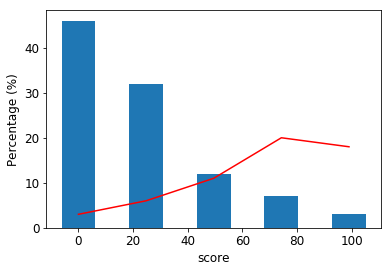

In [139]:
rupPred = RupturaPrediction(X)
rupPred.validate(Ytest, model)

In [ ]:
# eliminar os desconhecidos da analise
# 

In [11]:
rupPred = RupturaPrediction(X)
rupPred.addFirstY(Ytest)
scoreY = rupPred._validationSteps(Ytest, model)
scorePred = rupPred.getScore()

In [12]:
def getScoreEvolution(i_batch, scorePred, scoreY):
    scoresI = []
    yI = []
    for i in range(scorePred.shape[0]):
        scoresI.append(scorePred[i][i_batch])
        yI.append(scoreY[i][i_batch])
    return [scoresI,yI]   

In [13]:
dataScore = []
for j in range(scorePred.shape[1]):
    predictions = []
    isRuptura = False
    for i in range(scorePred.shape[0]):
        predictions.append(scorePred[i][j])
        if scoreY[i][j] == 1:
            rupScore = int(100*np.median(predictions))
            dataScore.append((rupScore,1))
            isRuptura = True
            break
    if not isRuptura:
        rupScore = int(100*np.median(predictions))
        dataScore.append((rupScore,0))   

Contratos adimplentes:   1045
Contratos inadimlentes:  429
xAxis:   [0.0, 24.25, 48.5, 72.75, 97.0] 

yAxis:   [10, 18, 31, 53, 82] 



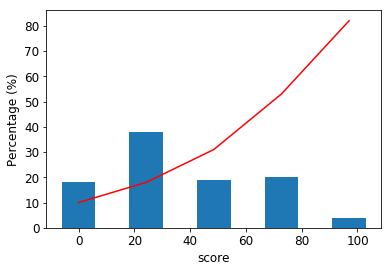

In [14]:
dataScore = pd.DataFrame(data=dataScore,columns=['score','Inadimplente'])
dataScore.loc[:,'Inadimplente'] = [str(x) for x in dataScore.loc[:,'Inadimplente'].values]
de = DataExploration(dataScore)
de.setNpoints(5)
de.graphicInadimplenciaXContinuum(dataScore, 'score')  # MELHORAR ESSE GRAFICO

In [8]:
dataScore.to_csv('score-rupt.csv',sep=';')

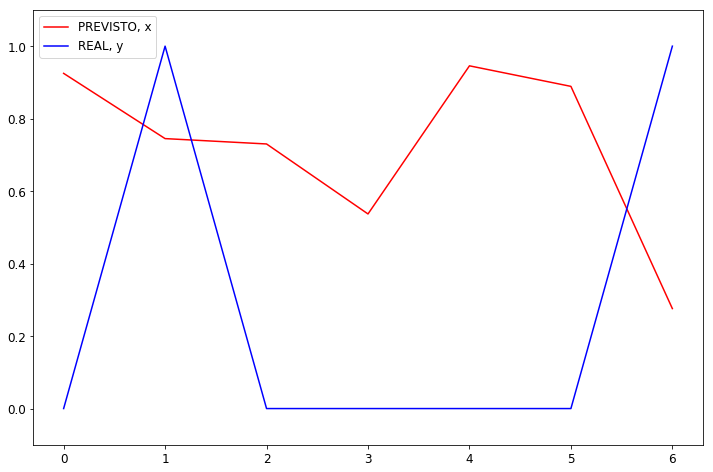

<Figure size 432x288 with 0 Axes>

In [52]:
i_batch = 739
scPred, y = getScoreEvolution(i_batch, scorePred, scoreY)
plt.figure(figsize=(12,8))
plt.ylim((-0.1, 1.1))  
plt.plot(range(len(scPred)), scPred, 'r', label='PREVISTO, x') # x
plt.plot(range(len(scPred)),y , 'b', label='REAL, y') # y
plt.legend(loc='best')
fig = plt.figure()
fig.savefig('')
plt.show()  

In [103]:
y

[0, 0, 1, 0, 1, 1, 1]